# Problem Statement

# 1) Objective:

```
# Ce texte est au format code
```



The objective of this project is to analyze and predict employee attrition at Acme Corporation. By identifying key factors that influence employee turnover, we aim to provide actionable insights that can help the HR department reduce attrition rates.

# 2) Business Context:

Employee attrition in this company, affects team dynamics, project continuity, and company morale. High turnover leads to increased recruitment and training costs, loss of experienced staff, and project disruptions. Understanding attrition factors helps develop strategies to retain talent and maintain a stable workforce.

## 3) Specific Goals:



*   1- Identify key factors that influence employee attrition at Acme Corporation.
*   2- Develop a predictive model to identify employees who are at high risk of leaving the company.

*   3- Provide recommendations to the HR department to reduce attrition rates based on the findings.
*   4- Analyze the impact of different managerial practices on employee satisfaction and retention.
*   5- Evaluate the influence of work-life balance policies on employee retention.









# Hypothesis Generation

# 1) Initial Hypotheses:

1. Employees with lower job satisfaction are more likely to leave the company.
2. Employees with fewer years of service are more likely to leave.
3. Higher levels of stress and workload contribute to higher attrition rates.
4. Employees with limited opportunities for career advancement are more likely to leave.
5. Poor performance evaluations are associated with higher attrition rates.

# 2) Potential Factors:

**Potential Factors Influencing Employee Attrition:**


*   Demographics: Age, Gender, Marital Status
*   Job Characteristics: Business Travel, Department, Job Role, Job Level, Job Involvement, Job Satisfaction
*   Compensation and Benefits: Daily Rate, Hourly Rate, Monthly Income, Monthly Rate, Stock Option Level, Percent Salary Hike
*   Work Environment: Distance from Home, Environment Satisfaction, Work-Life Balance, Overtime, Relationship Satisfaction
*   Career Development: Education, Education Field, Number of Companies Worked....
*   Performance: Performance Rating, Standard Hours



# Preprocessing and Cleaning:

1. **Data Exploration**: is the step in data preprocessing where we examine the characteristics of the data, understand its structure, identify missing or anomalous values, and discover relationships and distributions among the variables. This helps to better understand the data and guide subsequent steps of cleaning, transformation, and modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
# Display the first few rows of the DataFrame
print("Preview of the first few rows:")
print(df.head())


Preview of the first few rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

In [2]:
#Descovering the tail of the dataset
print('The tail of data')
print(df.tail())

The tail of data
      Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                       

In [3]:
#Descovering the shape of the dataset
print('The shape of data')
print(df.shape)

The shape of data
(1470, 35)


In [4]:
#Descovering the columns of the dataset
print('The columns of data')
print(df.columns)

The columns of data
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
# General information about the DataFrame
print("\nGeneral information:")
df.info()


General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

I noticed that EmployeeCount and StandardHours have a standard deviation (STD) of 0, which means that all values in these columns are the same.

In [6]:
# Descriptive statistics
print("\nDescriptive statistics:")
df.describe()


Descriptive statistics:


Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# Checking for missing values
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Based on the result of the unique values check,i notice that the columns EmployeeCount, Over18, and StandardHours have the same value in all entries. Therefore, these columns can be dropped as they do not provide any useful information for analysis

In [9]:
#unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
#Descovering the duplicated values of the dataset
print('The duplicated values of data')
print(df.duplicated().sum())

The duplicated values of data
0


The correlation matrix reveals the relationships between variables in the dataset. Variables with correlation coefficients close to +1, such as "MonthlyIncome" and "JobLevel" (0.95), indicate a strong positive linear relationship, while those near -1 show a strong negative linear relationship. Highly correlated variables suggest redundancy, which is important to consider for avoiding multicollinearity in model development.

The diagonal, as expected, shows a perfect correlation of 1 for each variable with itself. Features like "TotalWorkingYears" and "MonthlyIncome" (0.77) show high correlation, indicating similar effects on the dataset’s performance. Understanding these correlations aids in feature selection and model interpretation, ensuring robust analysis and accurate predictions.








Correlation matrix:


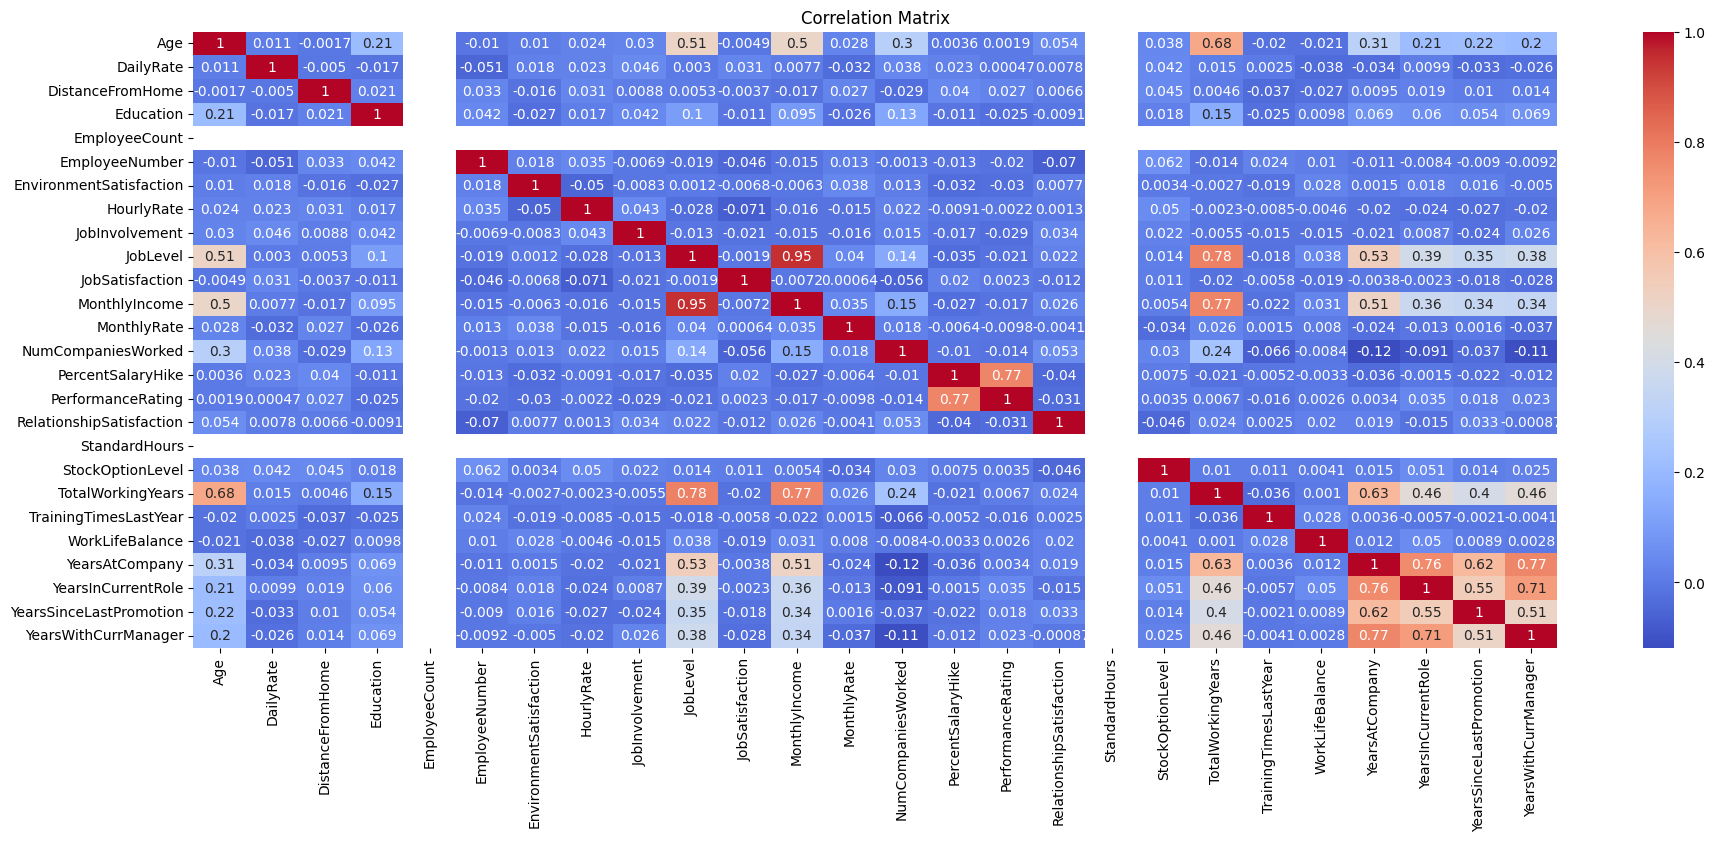

In [11]:
# Relationships between variables
print("\nCorrelation matrix:")
numeric_df=df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(22, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Because we have a high correlation between MonthlyIncome and JobLevel, I will drop the MonthlyIncome column.
df = df.drop(columns=['MonthlyIncome'])

Data visualisation

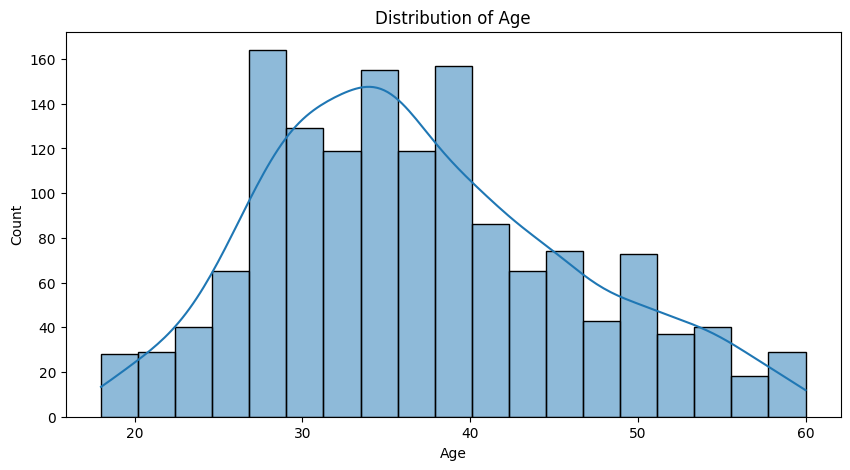

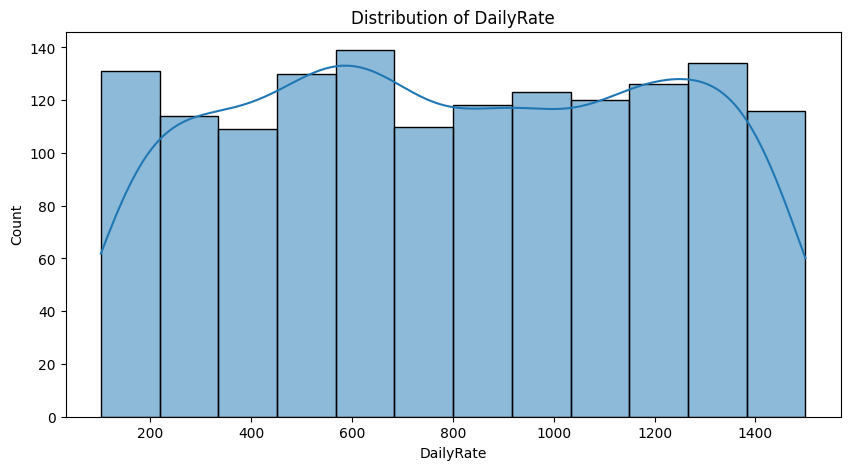

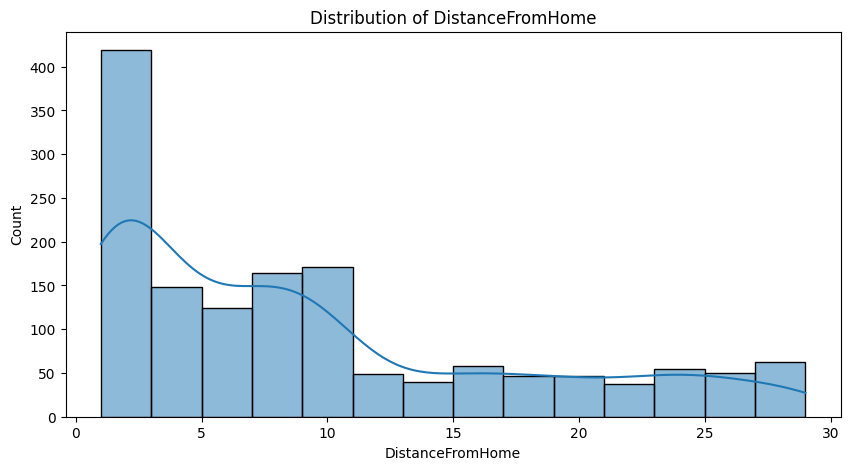

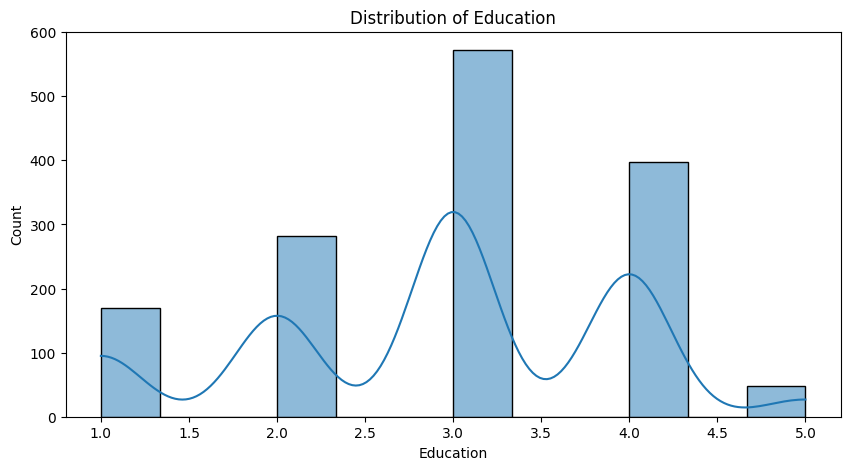

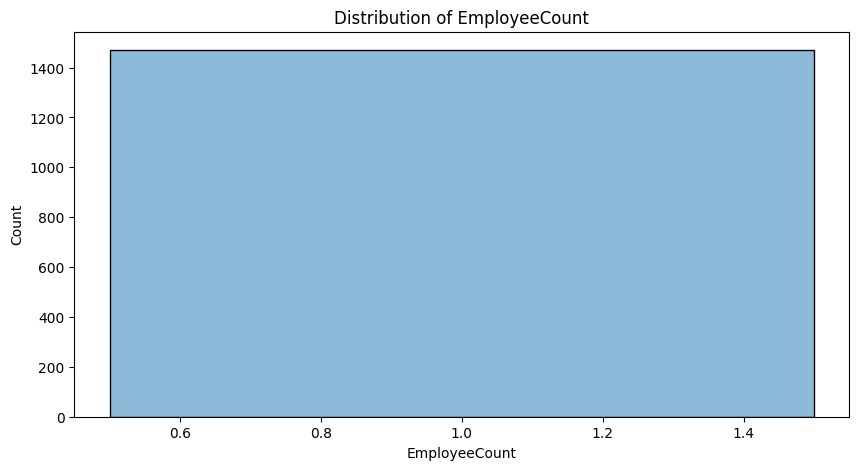

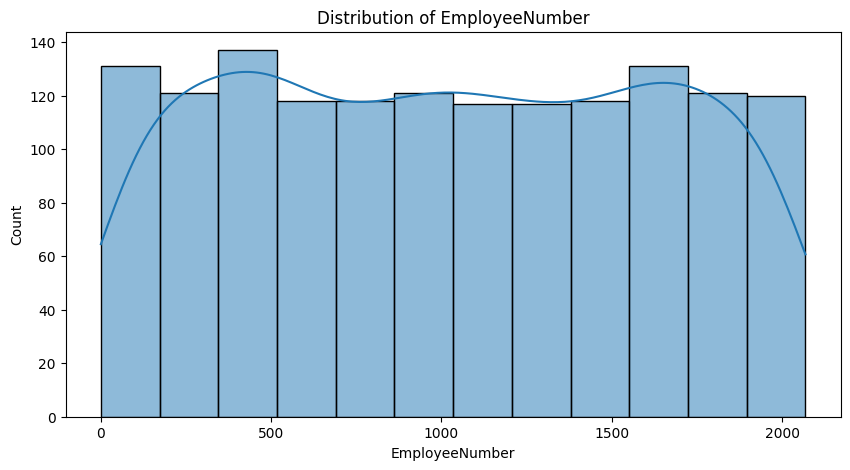

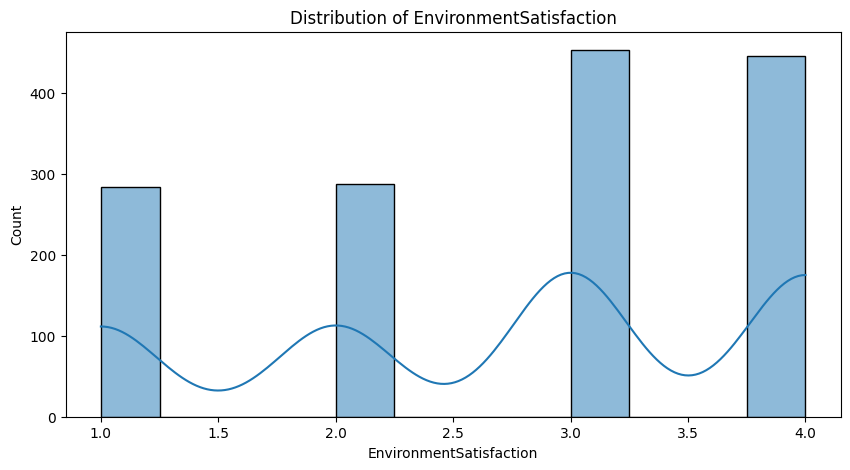

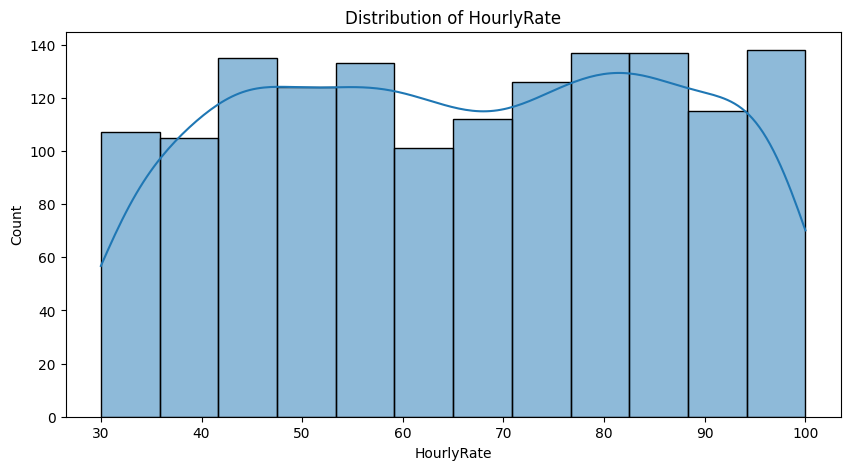

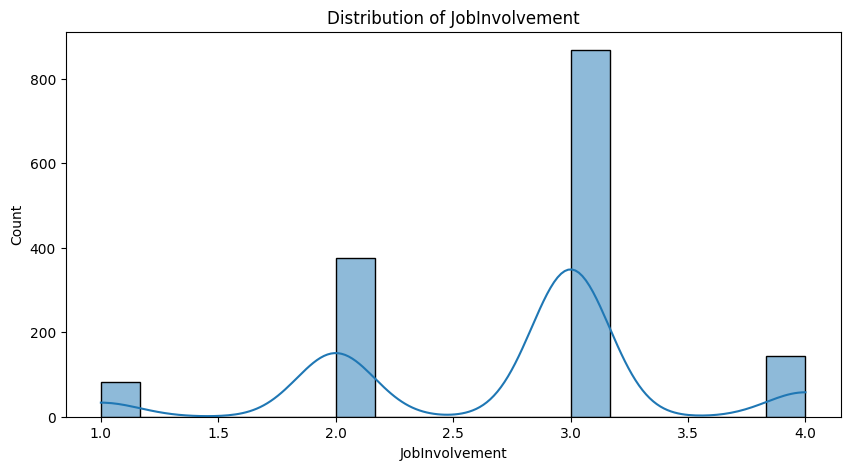

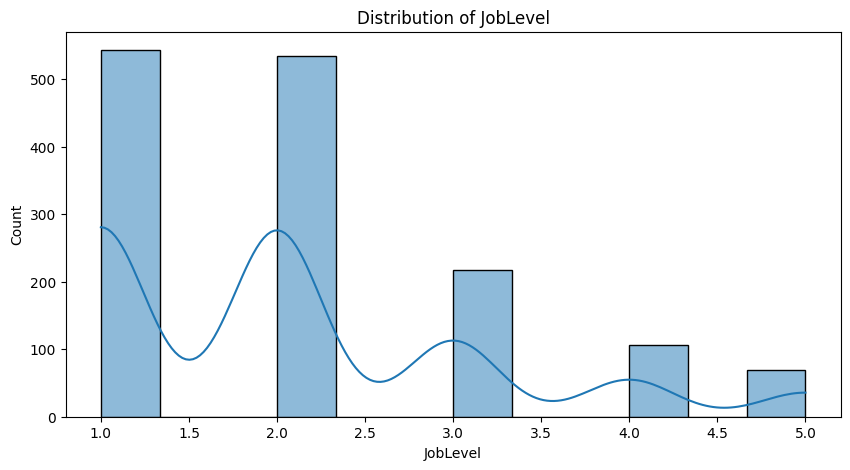

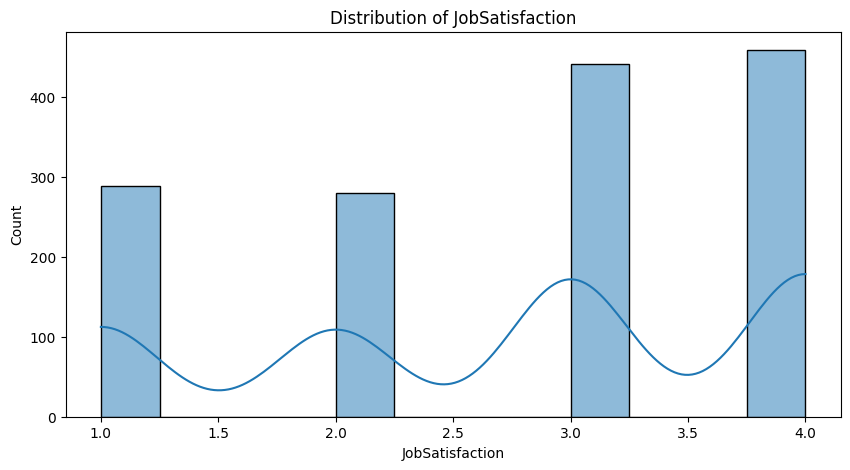

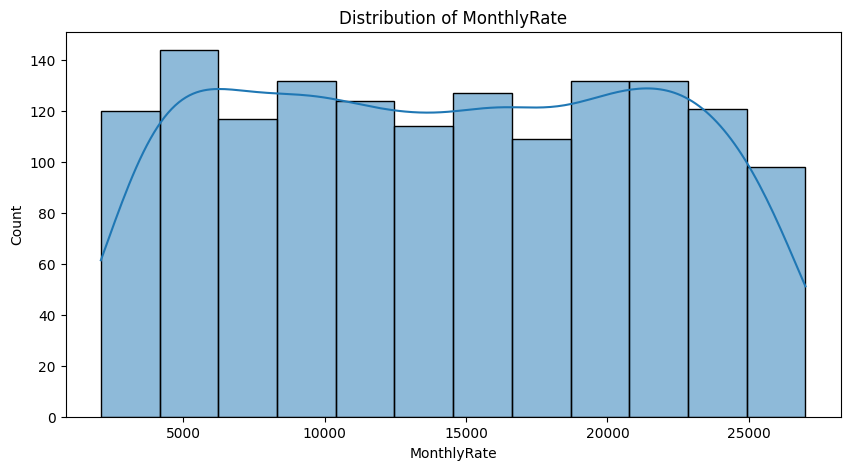

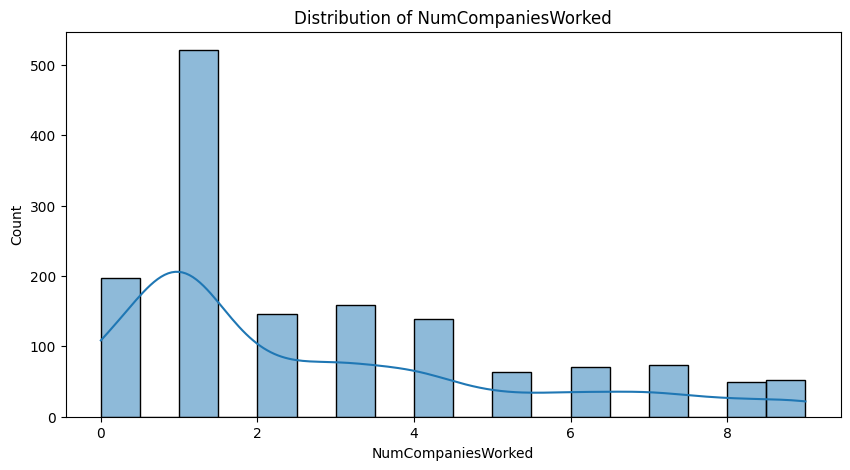

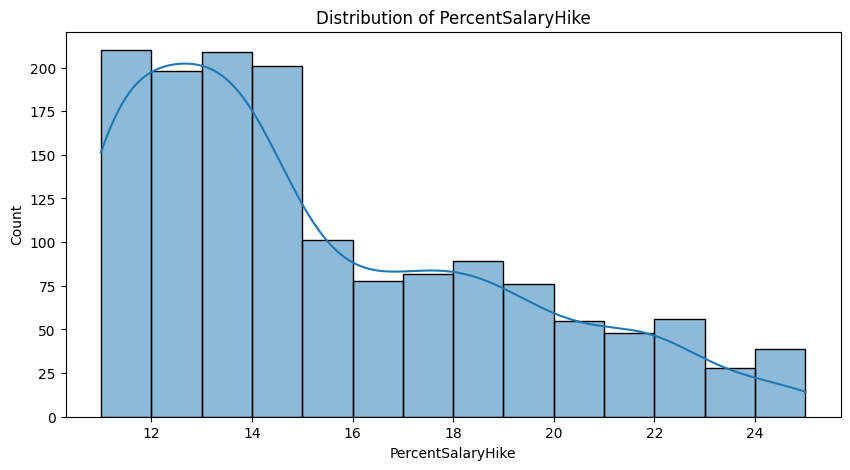

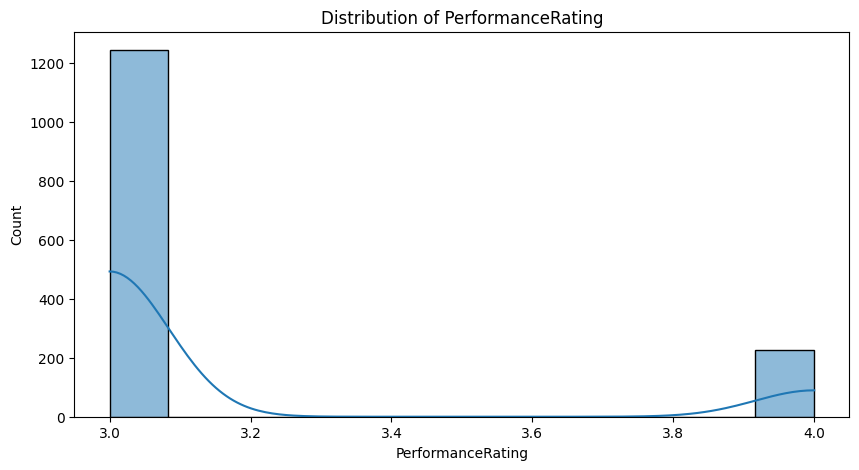

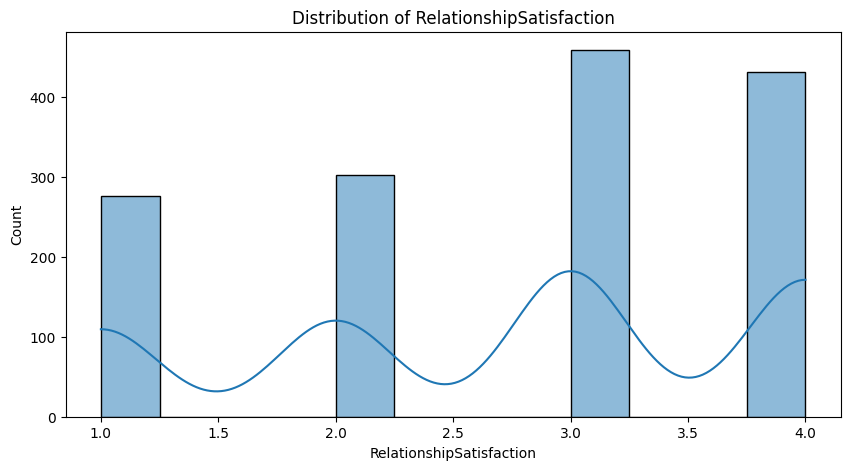

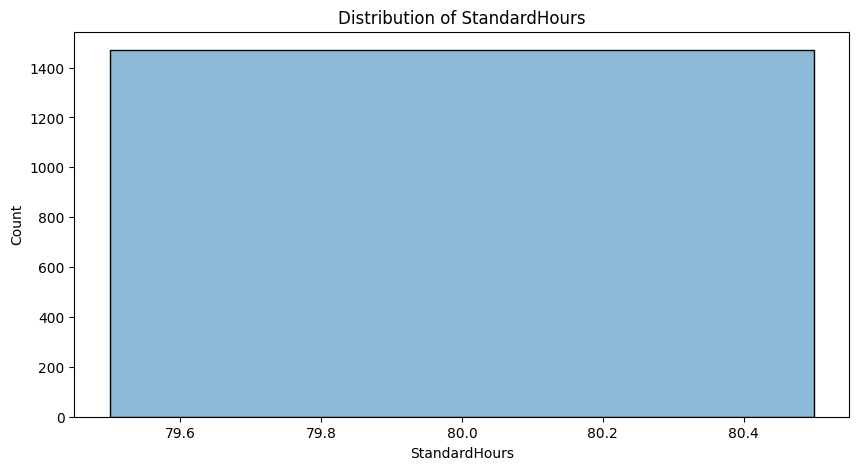

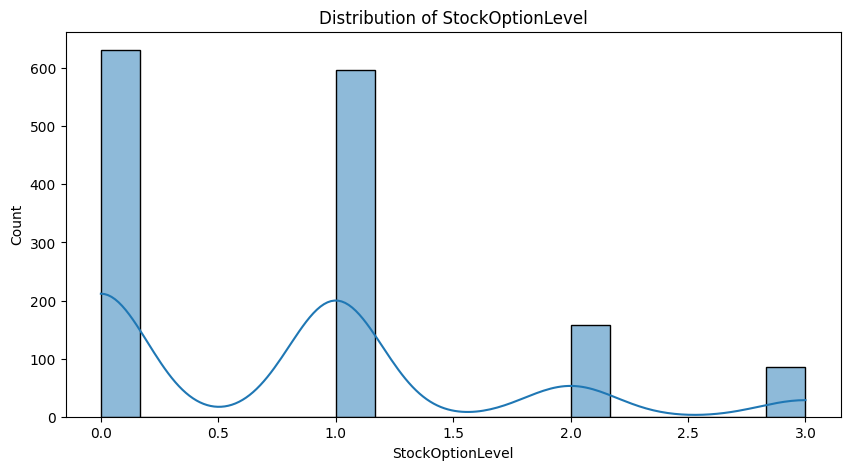

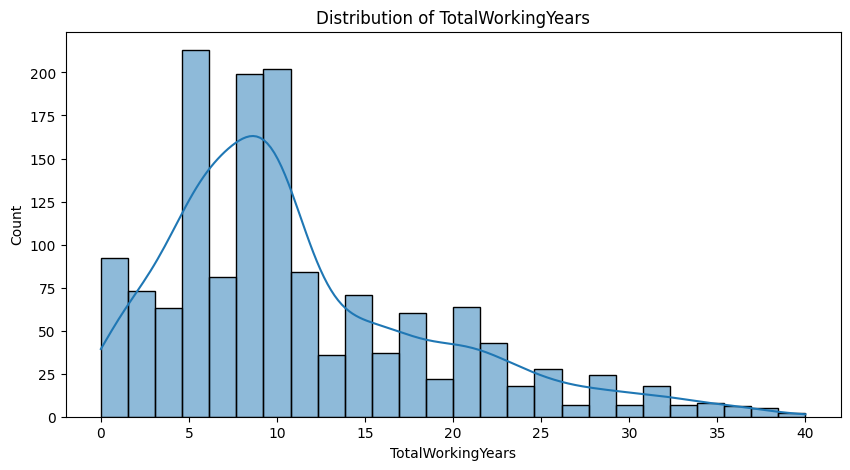

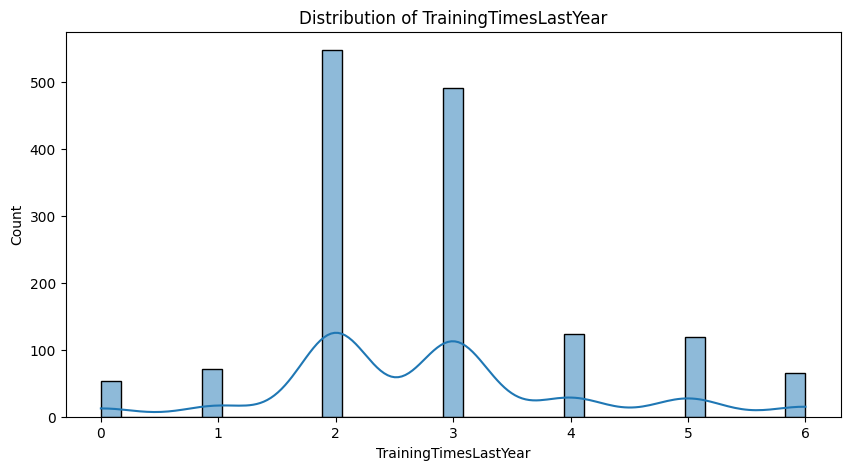

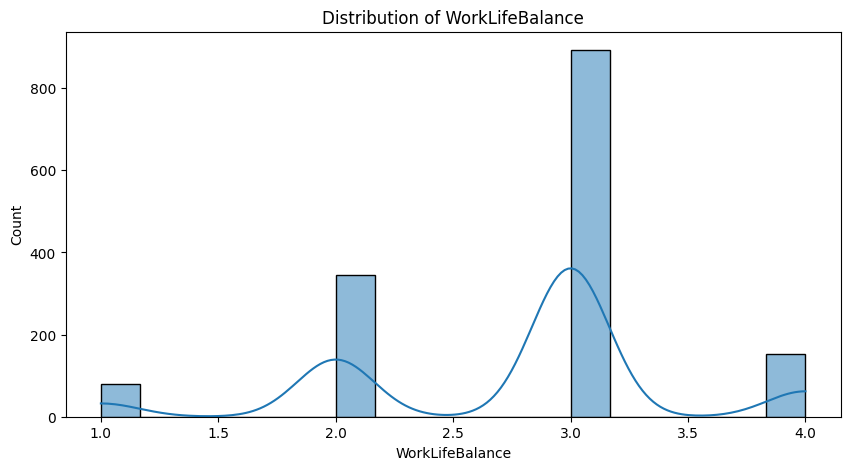

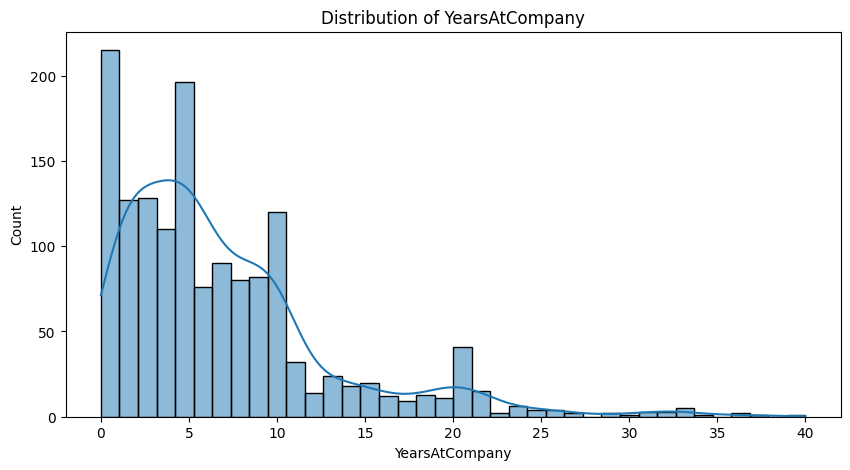

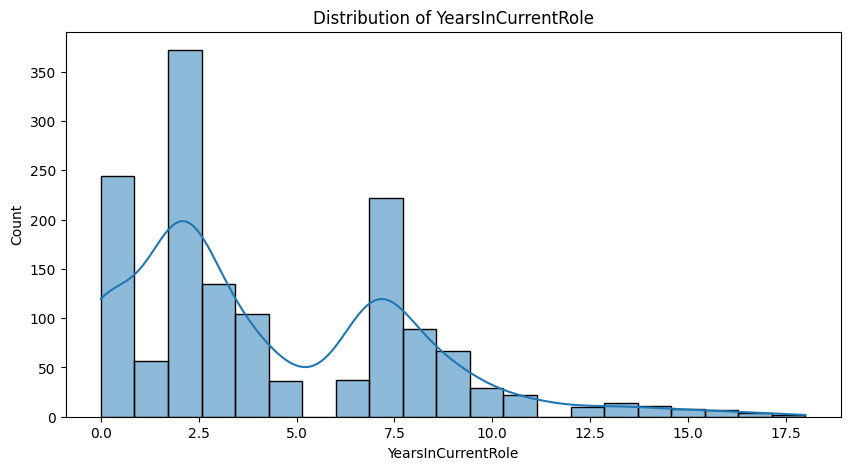

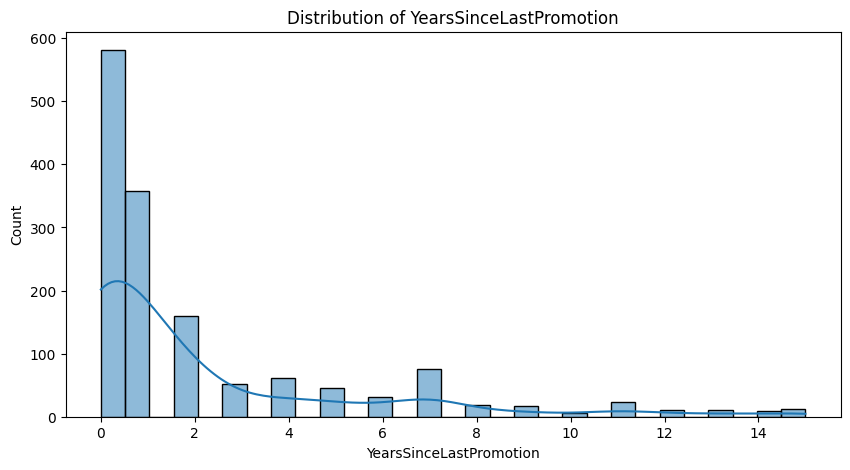

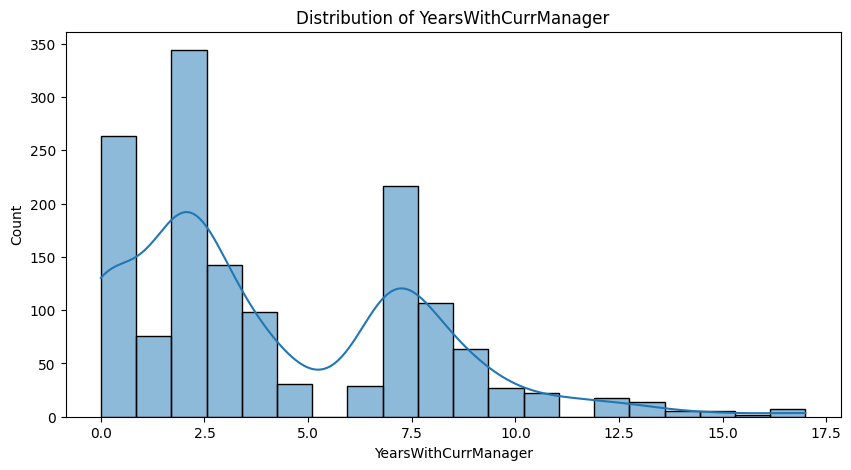

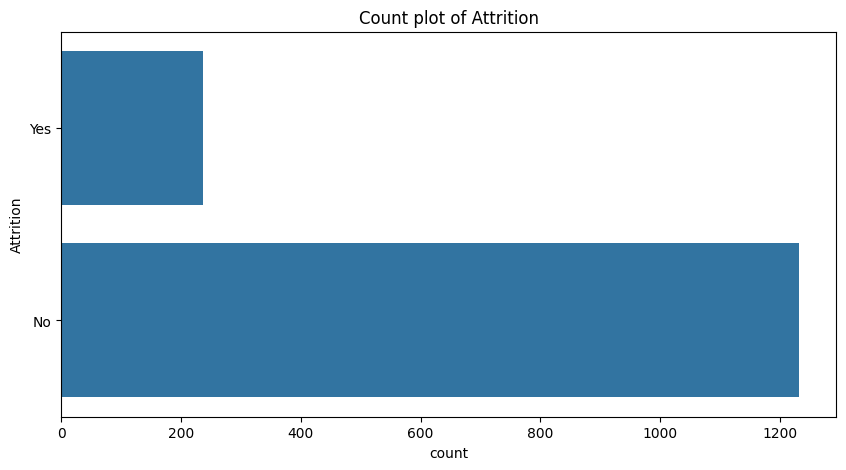

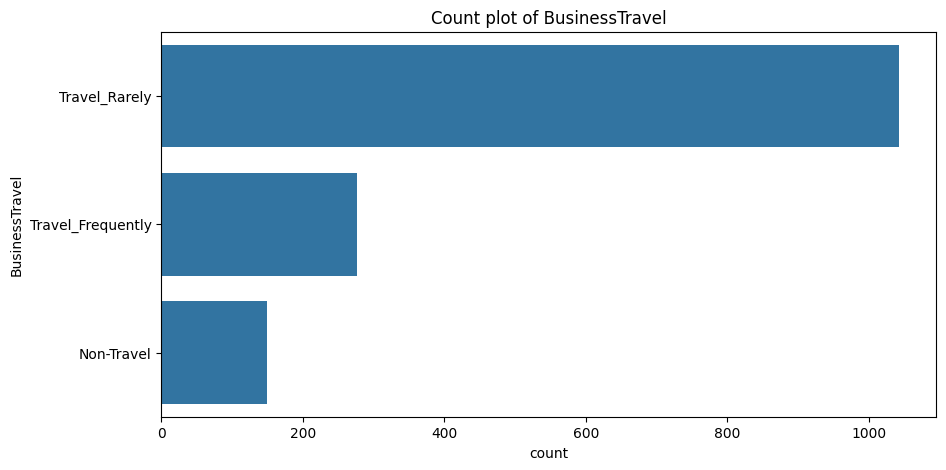

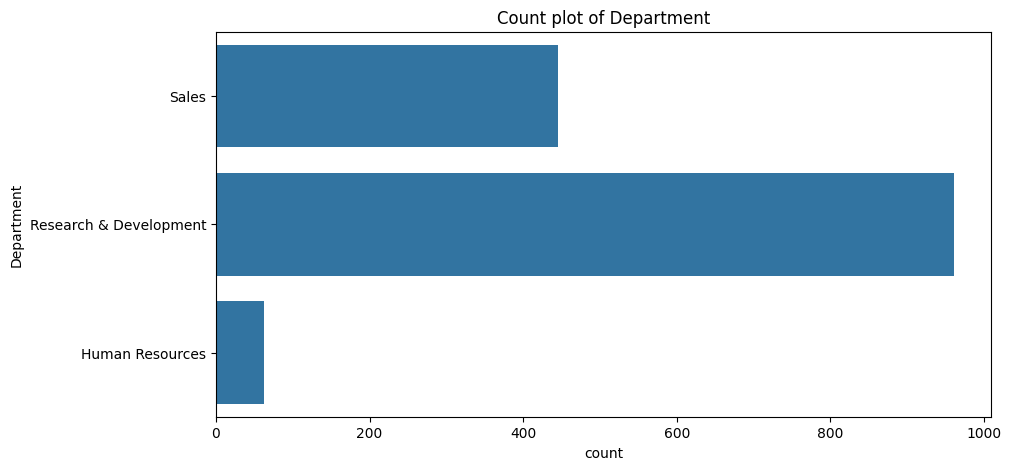

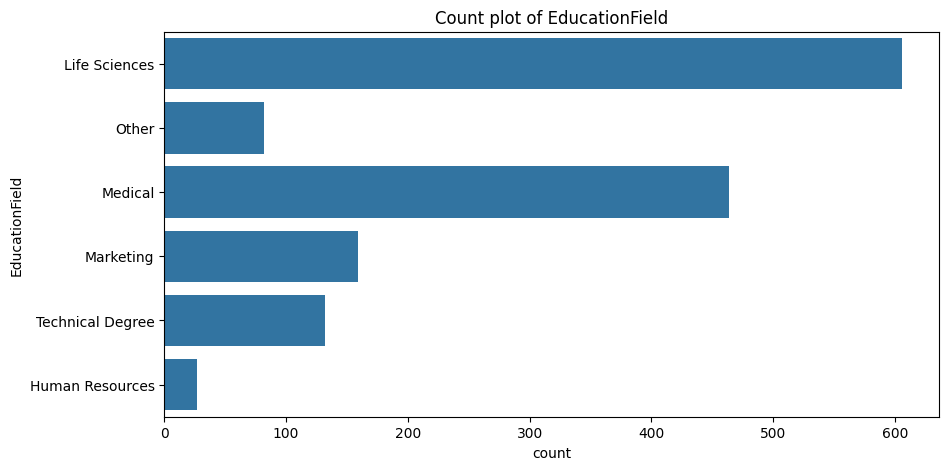

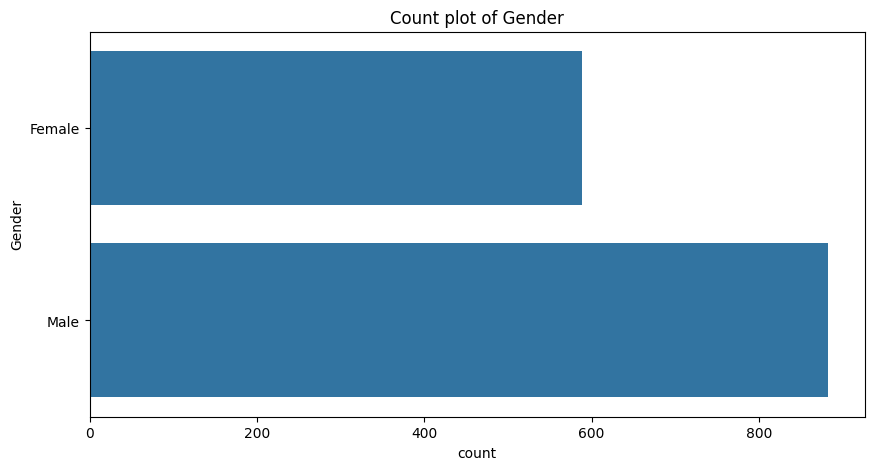

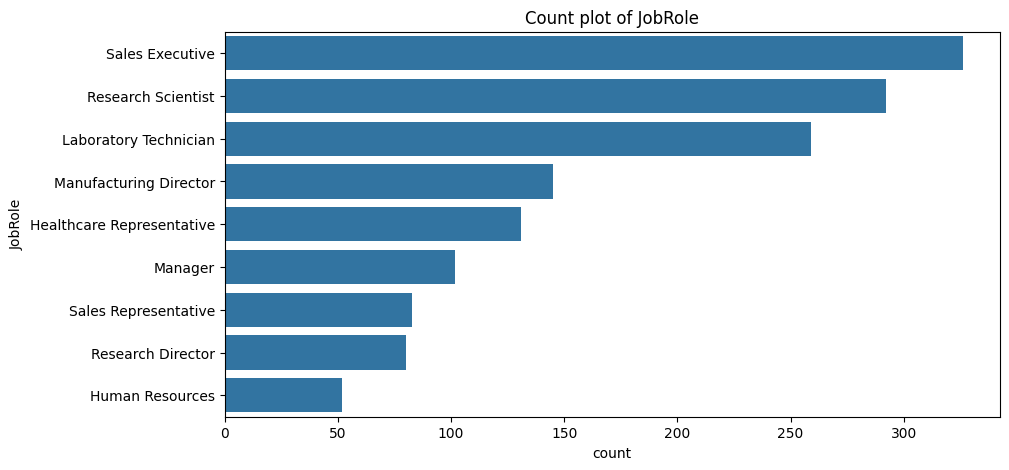

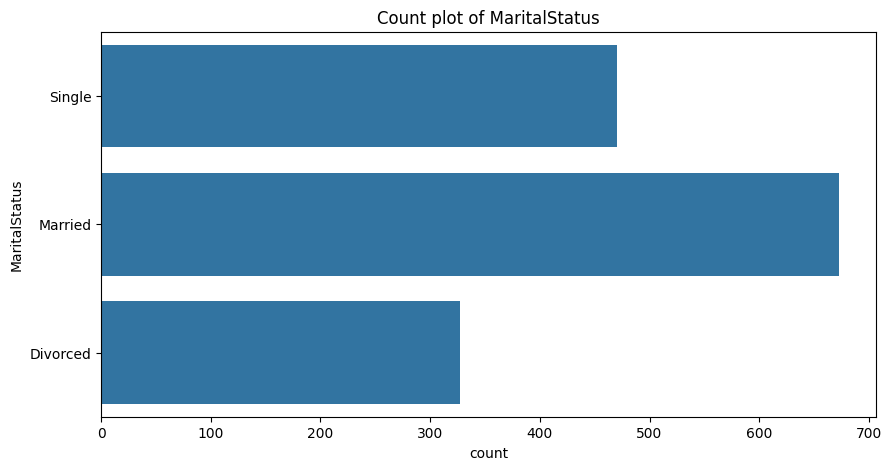

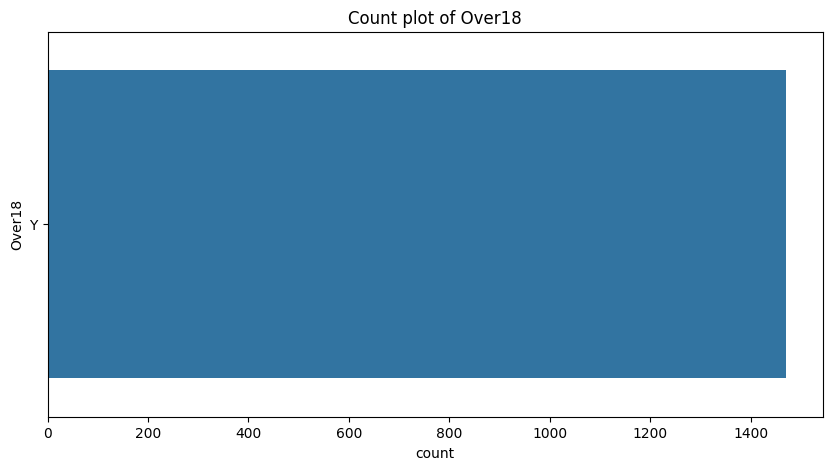

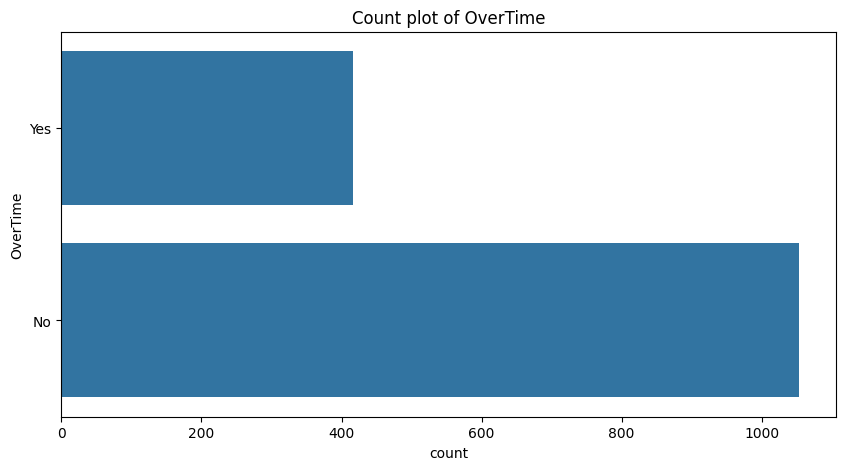

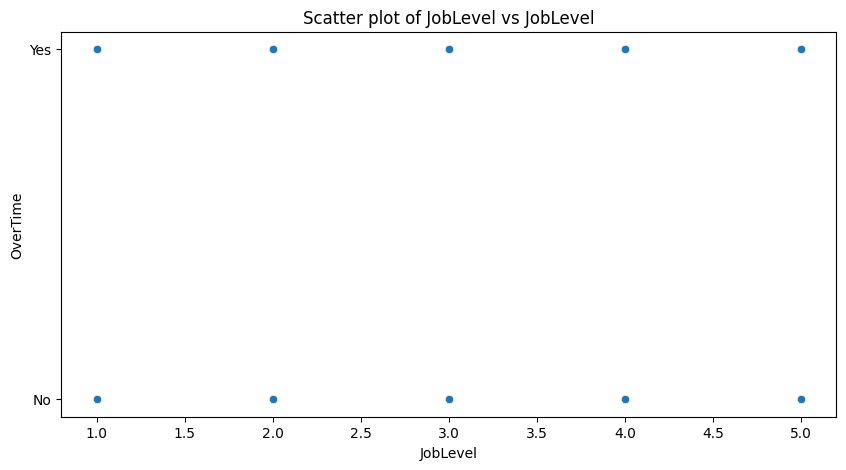

In [13]:
# Univariate Analysis - Distribution of numerical features
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Univariate Analysis - Categorical features
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.title(f'Count plot of {column}')
    plt.show()


# Bivariate Analysis - Scatter plot of highly correlated pairs
# Example: scatter plot of two columns with high correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='JobLevel', y='OverTime', data=df)  # replace 'column1' and 'column2' with your actual column names
plt.title('Scatter plot of JobLevel vs JobLevel')
plt.show()

# I)  Data cleaning

1) Handle Missing Values : we dont have any Missing values


2) Handle Duplicates : we dont have any Duplicates value


3) Dropping irrelevant columns


In [14]:
# this columns have the same values for each row so they dont give us a useful information
cols_to_delete = ['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber']

for col in cols_to_delete:
    if col in df.columns:
        df = df.drop(col, axis=1)


print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


4) handling  outliers  


---





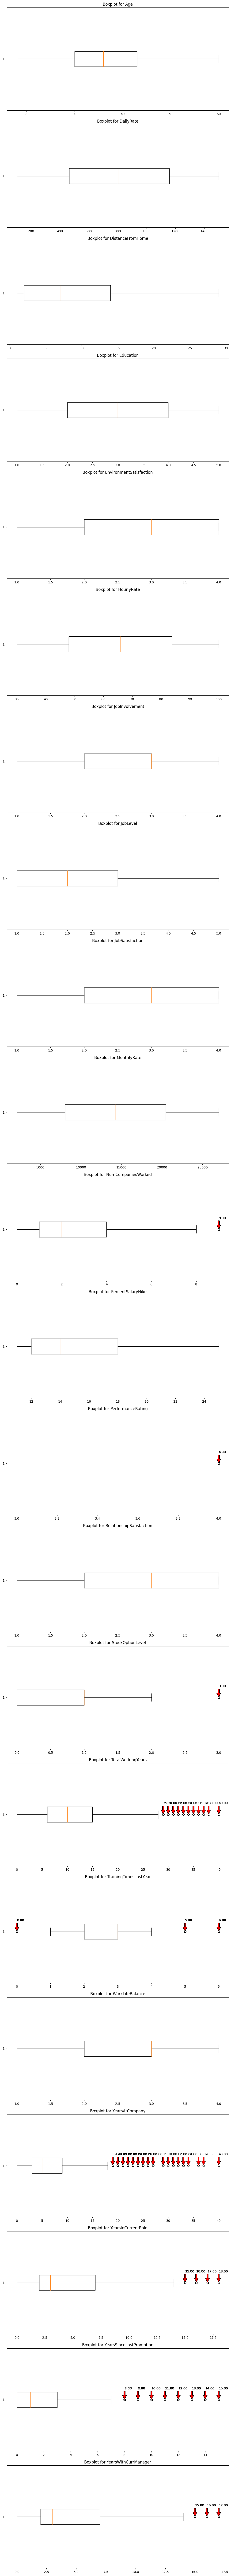

DataFrame size before removing outliers: (1470, 30)
DataFrame size after removing outliers: (994, 30)
Taille du DataFrame avant le capping des outliers : (994, 30)


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List of numerical columns for outlier handling
num_cols = df.select_dtypes(include=[np.number]).columns

# Dictionary to store outliers
outliers = {}

# Boxplots visualization
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 5 * len(num_cols)))

if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col], vert=False)
    ax.set_title(f'Boxplot for {col}')

    # Calculate outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using IQR
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]

    # Annotate outliers
    for outlier in outliers[col]:
        ax.annotate(f'{outlier:.2f}', xy=(outlier, 1), xytext=(outlier, 1.1),
                    arrowprops=dict(facecolor='red', shrink=0.05))

plt.tight_layout()
plt.show()

# Method 1: Trimming - Drop outliers for selected columns

columns_to_trim = ['YearsAtCompany', 'YearsSinceLastPromotion', 'TrainingTimesLastYear','YearsWithCurrManager']

print("DataFrame size before removing outliers:", df.shape)

# Remove outliers for selected numerical columns
for col in columns_to_trim:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Reset index after removing outliers
df.reset_index(drop=True, inplace=True)

# Display dataframe size after removing outliers
print("DataFrame size after removing outliers:", df.shape)

cols_to_cap = ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsInCurrentRole']

# Capping is a technique used in data preprocessing to limit extreme values in a dataset by setting upper and lower bounds.
for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                           np.where(df[col] > upper_limit, upper_limit, df[col]))

# il existe aussi une méthode s'appele binning

# II) Data transformation

# 1- features transformation :

```
# Ce texte est au format code
```



I change the Age and DistanceFromHome columns into categorical ranges to simplify analysis. For Age, I created five age groups, and for DistanceFromHome, I created four distance categories, assigning descriptive labels to each range.

In [17]:
bins = [0, 25, 35, 45, 55, 65]
labels = ['<25', '25-34', '35-44', '45-54', '55+']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

bins = [0, 5, 10, 20, 30]
labels = ['Very Close', 'Close', 'Moderate', 'Far']
df['DistanceFromHome'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=False)

In [18]:
# find categorical features
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# 2- Data encoding

* Binary Encoding: Converts categorical values into binary digits, combining features to reduce dimensionality.
* One-Hot Encoding: Creates separate binary columns for each category, indicating the presence or absence of each category.
* Ordinal Encoding: Assigns integer values to categories based on their order or rank.


In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Binary Encoding for Attrition
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

# Binary Encoding for Gender
df['Gender'] = df['Gender'].replace({'Female': 1, 'Male': 0})

# Binary Encoding for OverTime
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

# Ordinal Encoding for BusinessTravel
travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
encoder = OrdinalEncoder(categories=[travel_order])
df['BusinessTravel'] = encoder.fit_transform(df[['BusinessTravel']])

# One-Hot Encoding for Department
df = pd.get_dummies(df, columns=['Department'], prefix='Department')

# One-Hot Encoding for Age
df = pd.get_dummies(df, columns=['Age'], prefix='Age')

# One-Hot Encoding for DistanceFromHome
df = pd.get_dummies(df, columns=['DistanceFromHome'], prefix='DistanceFromHome')

# One-Hot Encoding for EducationField
df = pd.get_dummies(df, columns=['EducationField'], prefix='EducationField')

# One-Hot Encoding for MaritalStatus
df = pd.get_dummies(df, columns=['MaritalStatus'], prefix='MaritalStatus')

# One-Hot Encoding for JobRole
df = pd.get_dummies(df, columns=['JobRole'], prefix='JobRole')
df = df.astype(int)
print(df)

     Attrition  BusinessTravel  DailyRate  Education  EnvironmentSatisfaction  \
0            0               2        279          1                        3   
1            1               1       1373          2                        4   
2            0               2       1392          4                        4   
3            0               1        591          1                        1   
4            0               2       1005          2                        4   
..         ...             ...        ...        ...                      ...   
989          0               0        325          3                        2   
990          0               1       1167          3                        4   
991          0               2        884          2                        3   
992          0               2       1023          3                        4   
993          0               1        628          3                        2   

     Gender  HourlyRate  Jo

# 3- scaling features using standarisation

Standardization centers the data around 0 and scales it based on the standard deviation. This transformation does not change the shape of the distribution but ensures that each feature has a mean of 0 and a standard deviation of 1.

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate the target column 'Attrition'
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (excluding the 'Attrition' column)
X_scaled = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target column back to the DataFrame
X_scaled['Attrition'] = y.values

# Print the resulting DataFrame
print(X_scaled)

# Combine X_scaled and y to create a new DataFrame
df_scaled = X_scaled.copy()
df_scaled['Attrition'] = y.values

df=df_scaled.copy()
# Print the resulting DataFrame
print(df_scaled)


     BusinessTravel  DailyRate  Education  EnvironmentSatisfaction    Gender  \
0          1.729083  -1.342297  -1.840559                 0.245413 -0.788374   
1         -0.167946   1.396821  -0.864297                 1.155639 -0.788374   
2          1.729083   1.444392   1.088228                 1.155639  1.268434   
3         -0.167946  -0.561123  -1.840559                -1.575039 -0.788374   
4          1.729083   0.475436  -0.864297                 1.155639 -0.788374   
..              ...        ...        ...                      ...       ...   
989       -2.064976  -1.227124   0.111966                -0.664813 -0.788374   
990       -0.167946   0.881045   0.111966                 1.155639  1.268434   
991        1.729083   0.172480  -0.864297                 0.245413 -0.788374   
992        1.729083   0.520503   0.111966                 1.155639 -0.788374   
993       -0.167946  -0.468483   0.111966                -0.664813 -0.788374   

     HourlyRate  JobInvolvement  JobLev

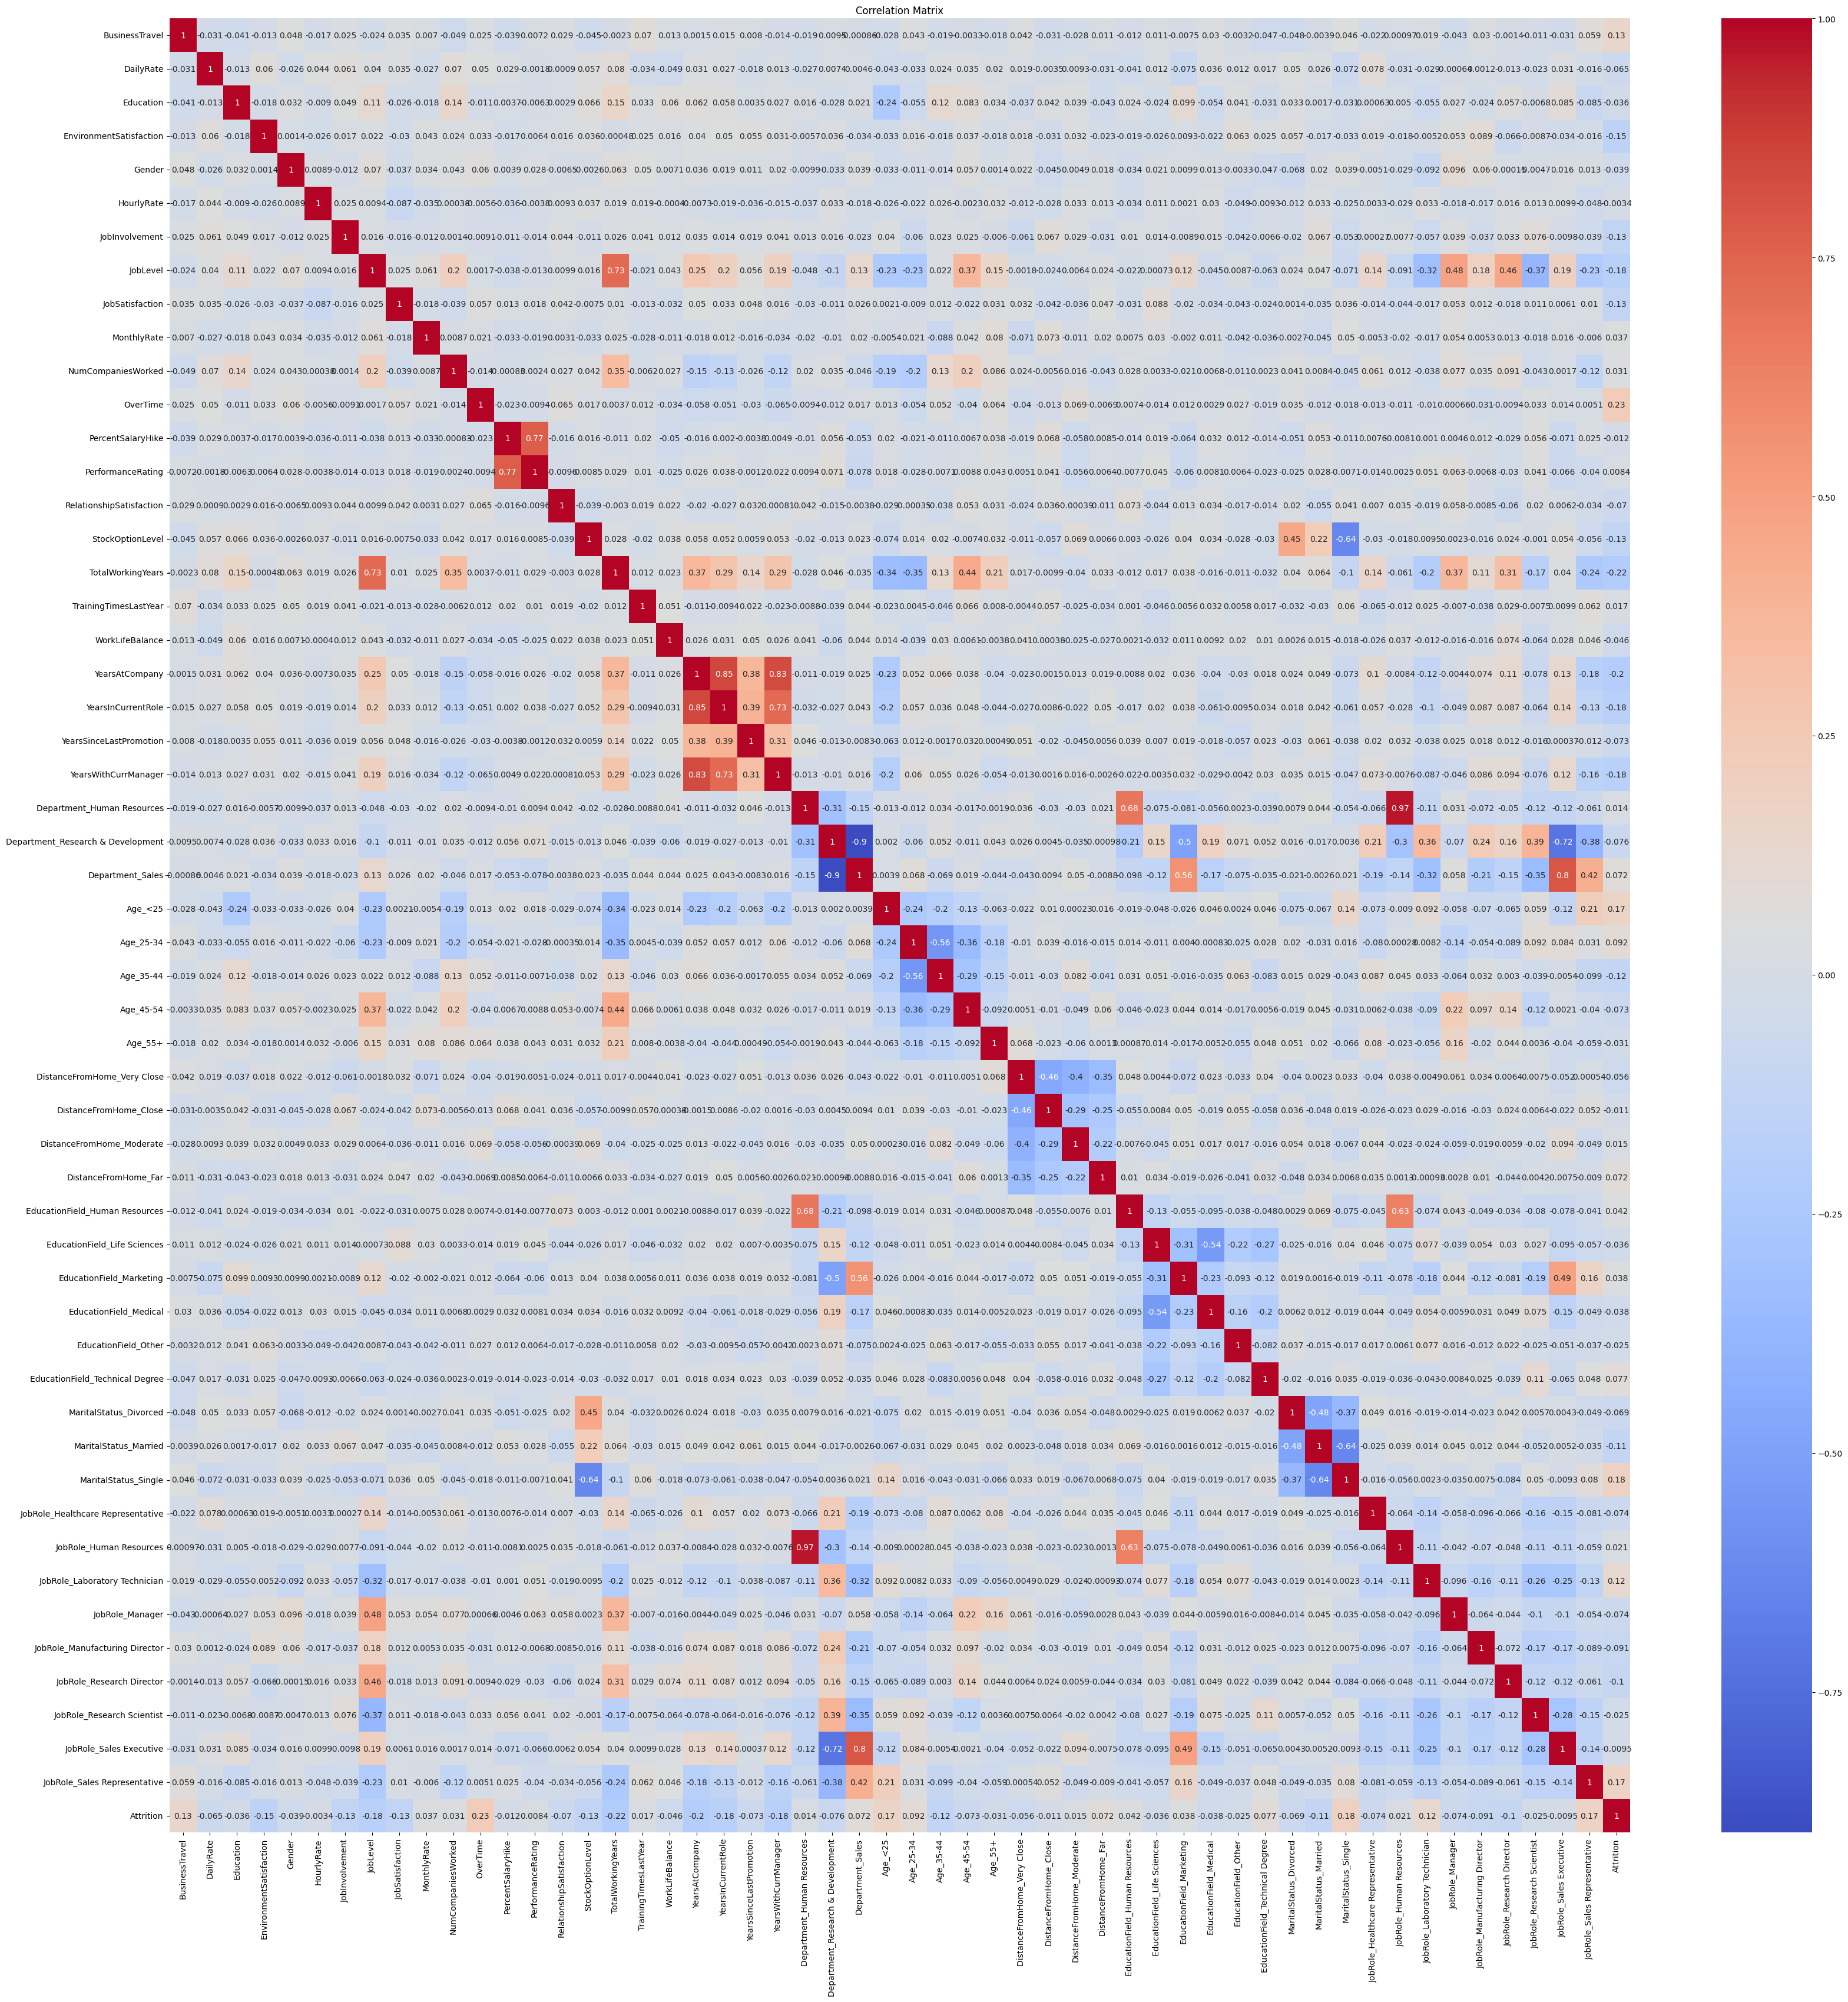

In [21]:
numeric_df=df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature extraction

 Feature extraction is the process of identifying and selecting the most important information or characteristics from a data set.

# 1- Dimensionality reduction :



Dimensionality reduction can be done in 2 ways:

a. Feature Selection: By only keeping the most relevant variables from the original dataset
****
i. Correlation
Purpose: Identify and keep features that are highly correlated with the target variable or with other features.

ii. Forward Selection and iii. Backward Elimination
Purpose: Iteratively add (forward selection) or remove (backward elimination) features based on their impact on model performance.

iv. SelectKBest
Purpose: Select the top k features based on statistical tests like ANOVA or chi-square.

v. Missing Value Ratio
Purpose: Remove features with a high percentage of missing values, assuming they may not contribute significantly to the model.

****

b. Feature Extraction: By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables.

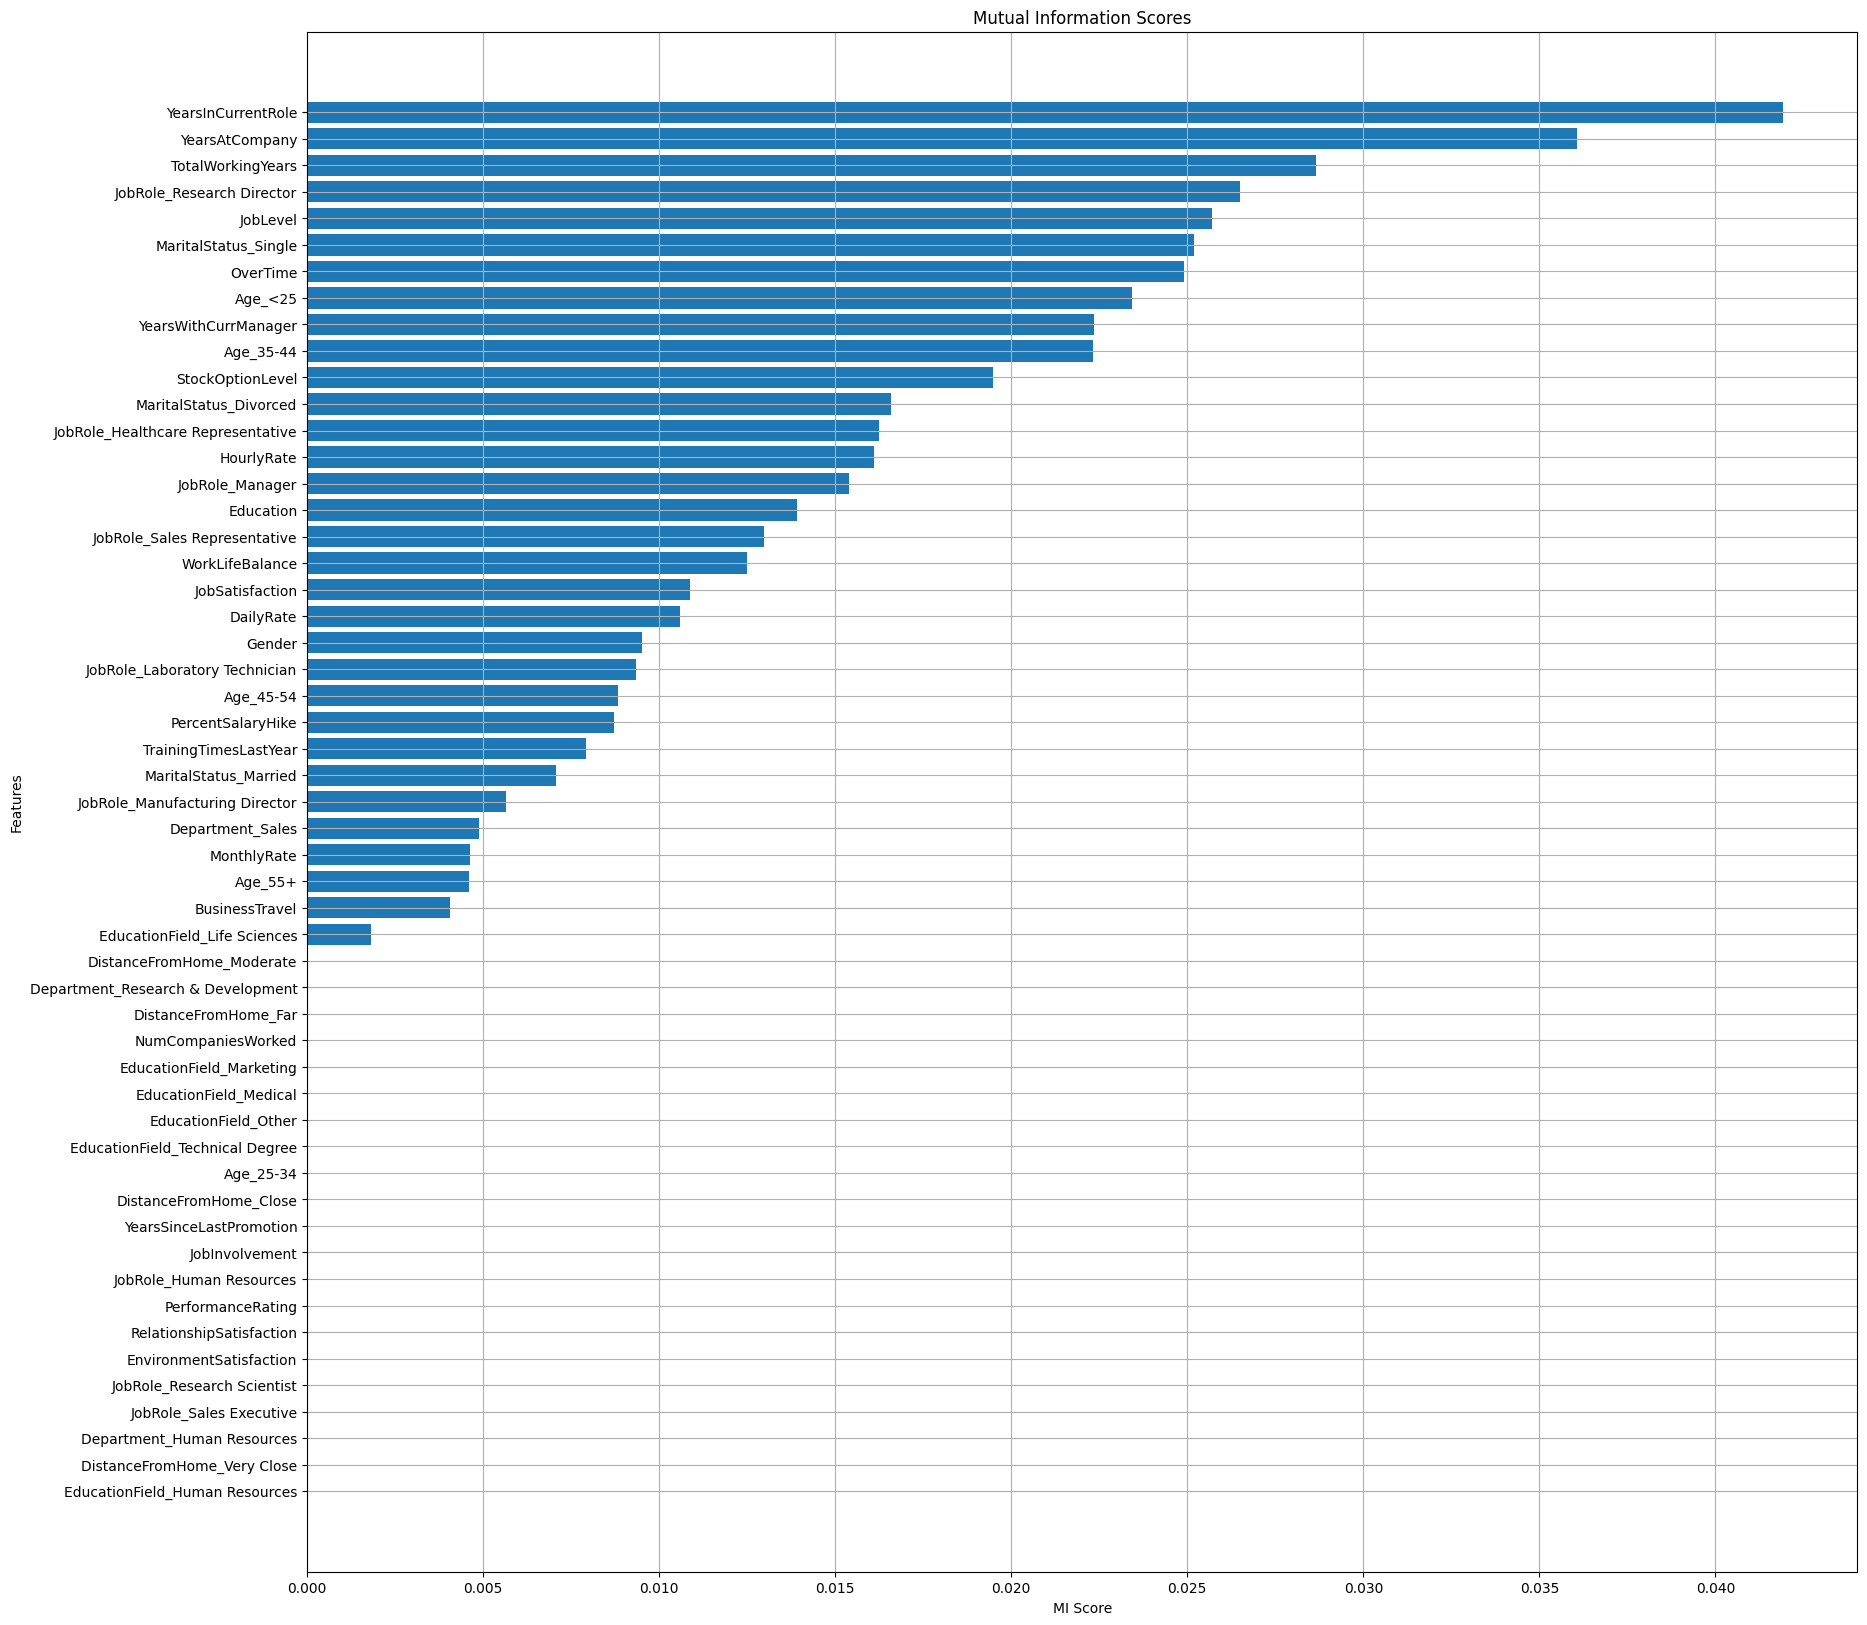


Distribution in y_test:
Attrition
0    827
1    167
Name: count, dtype: int64


In [22]:
# MI method : used to determine how much information a feature provides about the target variable,
# helping to identify the most relevant features for a predictive model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

def make_mi_score_and_plot(X, y):
    # Calculate Mutual Information scores
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # Plot the MI scores for each feature
    plt.figure(figsize=(20, 20))
    mi_scores = mi_scores.sort_values(ascending=True)  # Sort for better visualization
    width = np.arange(len(mi_scores))
    ticks = list(mi_scores.index)
    plt.barh(width, mi_scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel('MI Score')
    plt.ylabel('Features')
    plt.grid(True)
    plt.show()

    return mi_scores

# Example usage:
X = df.copy()
y = X.pop("Attrition")
mi_scores = make_mi_score_and_plot(X, y)
test_counts =  y.value_counts()
print("\nDistribution in y_test:")
print(test_counts)


# this  MI scores for each feature sorting for  better visualization
# we can notice that we have some featres with 0 score so i decide to drop them

In [23]:
# Remove features with MI scores below a certain threshold
threshold = 0.001
low_mi_features = mi_scores[mi_scores < threshold].index

print(X.shape)
print(X.columns)
X_selected = X.drop(columns=low_mi_features)
X_selected.columns
print(X_selected.shape)

(994, 53)
Index(['BusinessTravel', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Age_<25',
       'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55+',
       'DistanceFromHome_Very Close', 'DistanceFromHome_Close',
       'DistanceFromHome_Moderate', 'DistanceFromHome_Far',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalS

# Data spliting
Data splitting is the process of dividing a dataset into separate parts to train and evaluate machine learning models.

Cross-Validation and Evaluation Function: https://datascientest.com/cross-validation

Because we have a small data and we want a stong model i decide to use cross validation method

**Difference between StratifiedKFold and Kfold**
1. Cross-Validation (StratifiedKFold):Cross-validation is a technique used to assess the performance of machine learning models by dividing the data into k subsets.
2. cross_val_predict: cross_val_predict is a function used in cross-validation where predictions are made for each data point when it is in the test set, using a model trained on the rest of the data.

**the plot_learning_curve_fonction** : function generates a learning curve plot that shows the training and cross-validation scores of a machine learning model for various training set sizes, helping to visualize model performance, detect overfitting or underfitting, and compare it to a reference accuracy level. need:

1.   estimator: the machine learning model or algorithm.
2.   cv: the cross validation splitting strategy.





**The plot_cv_results function** : is designed to visualize the cross-validation scores of a machine learning model.
     
         

*   range(1, len(cv_results) + 1): Creates a range of numbers from 1 to the number of cross-validation scores.
*   cv_results: The y-axis values, representing the accuracy scores for each fold.
*   marker='o': Plots each point with a circular marker.
linestyle='-': Connects the points with a solid line.
*   color='b': Sets the color of the line and markers to blue.
   Élément de liste





*  Precision: 65% : This means that when the model predicts that an employee will leave their job (class 1), it is correct 65% of the time.

*  Recall: 47% : This means that among all employees who actually leave their job, the model correctly identifies 47% of them.

*  F1-score: 54% : The F1-score is the harmonic mean of precision and recall. A score of 54% indicates a moderate balance between precision and recall for this class.

*  Support: 167: There are 167 employees in the dataset who leave their job.

Accuracy for Logistic Regression: 0.8543

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       827
           1       0.81      0.85      0.83       827

    accuracy                           0.82      1654
   macro avg       0.82      0.82      0.82      1654
weighted avg       0.82      0.82      0.82      1654


Confusion Matrix for Logistic Regression:
[[660 167]
 [127 700]]



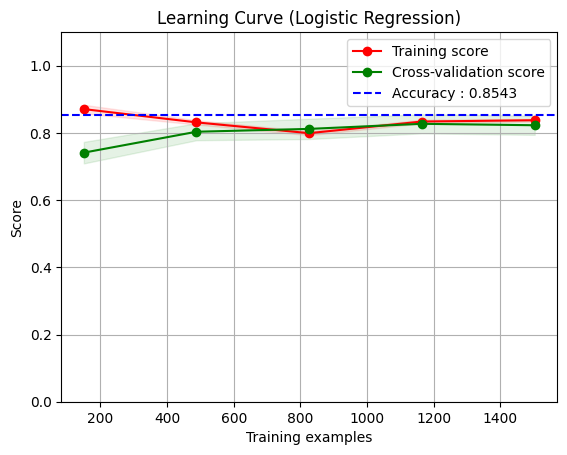

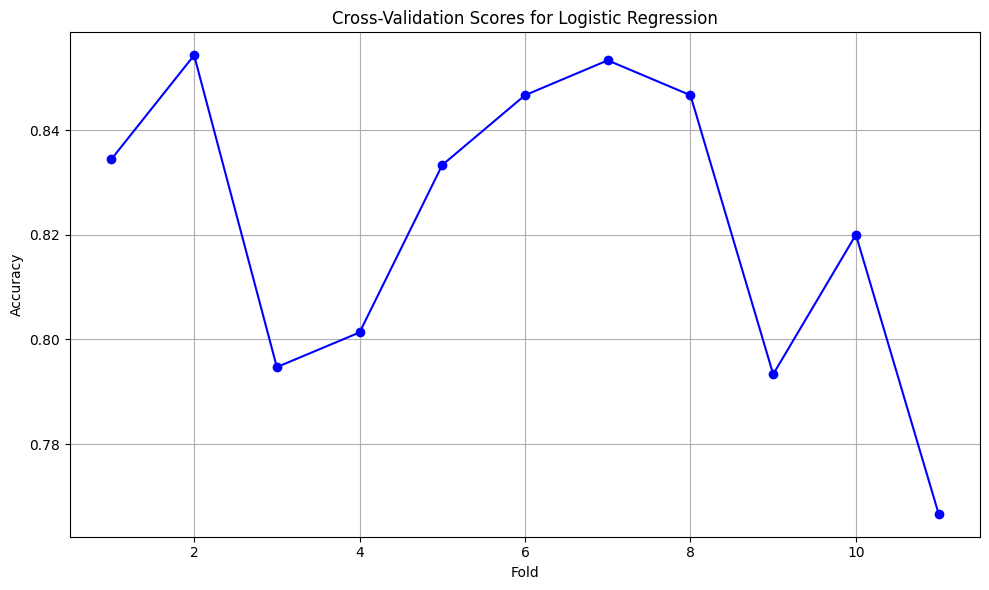

Accuracy for Decision Tree: 0.8477

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       827
           1       0.84      0.82      0.83       827

    accuracy                           0.83      1654
   macro avg       0.83      0.83      0.83      1654
weighted avg       0.83      0.83      0.83      1654


Confusion Matrix for Decision Tree:
[[697 130]
 [148 679]]



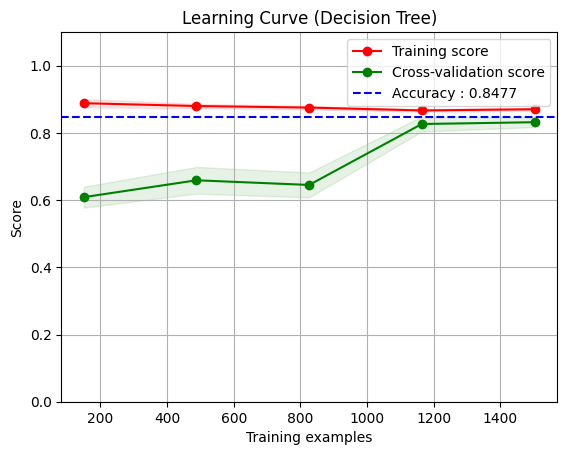

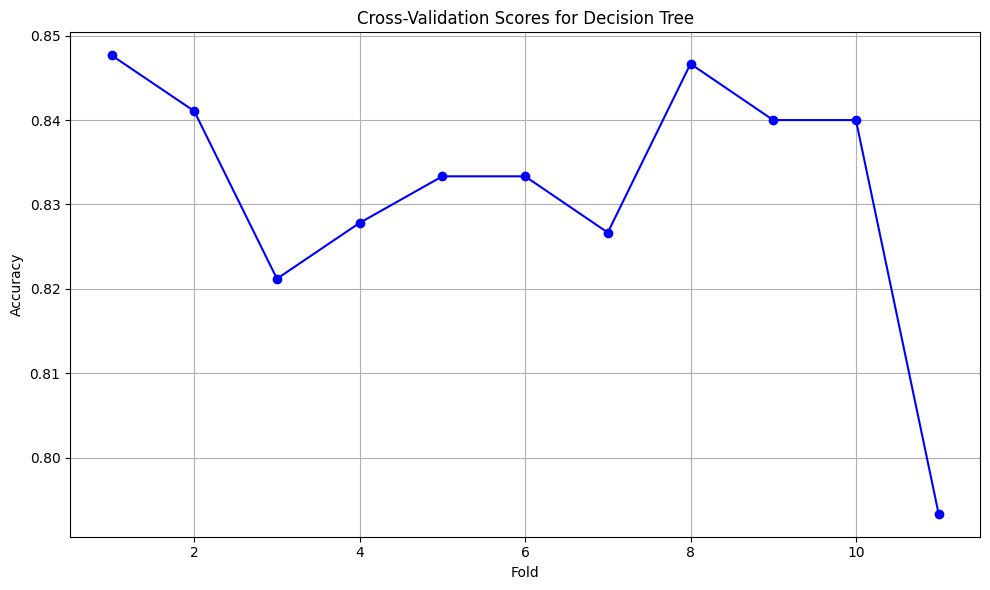

Accuracy for Random Forest: 0.9533

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       827
           1       0.96      0.89      0.93       827

    accuracy                           0.93      1654
   macro avg       0.93      0.93      0.93      1654
weighted avg       0.93      0.93      0.93      1654


Confusion Matrix for Random Forest:
[[800  27]
 [ 92 735]]



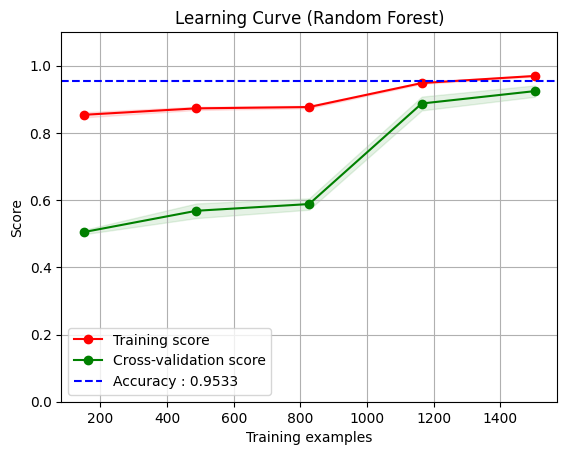

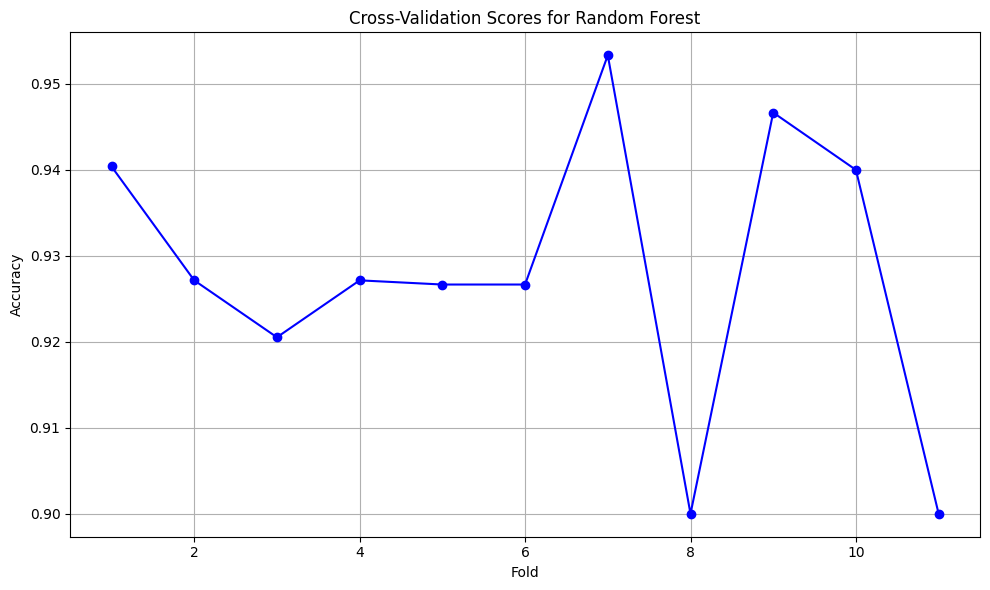

Accuracy for K-Nearest Neighbors: 0.8477

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.98      0.60      0.74       827
           1       0.71      0.99      0.83       827

    accuracy                           0.79      1654
   macro avg       0.85      0.79      0.79      1654
weighted avg       0.85      0.79      0.79      1654


Confusion Matrix for K-Nearest Neighbors:
[[495 332]
 [ 10 817]]



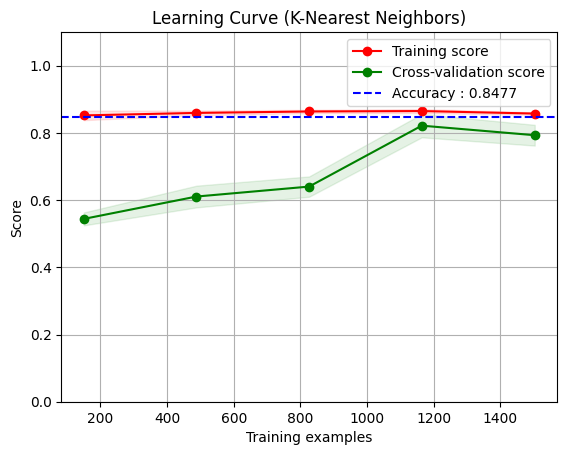

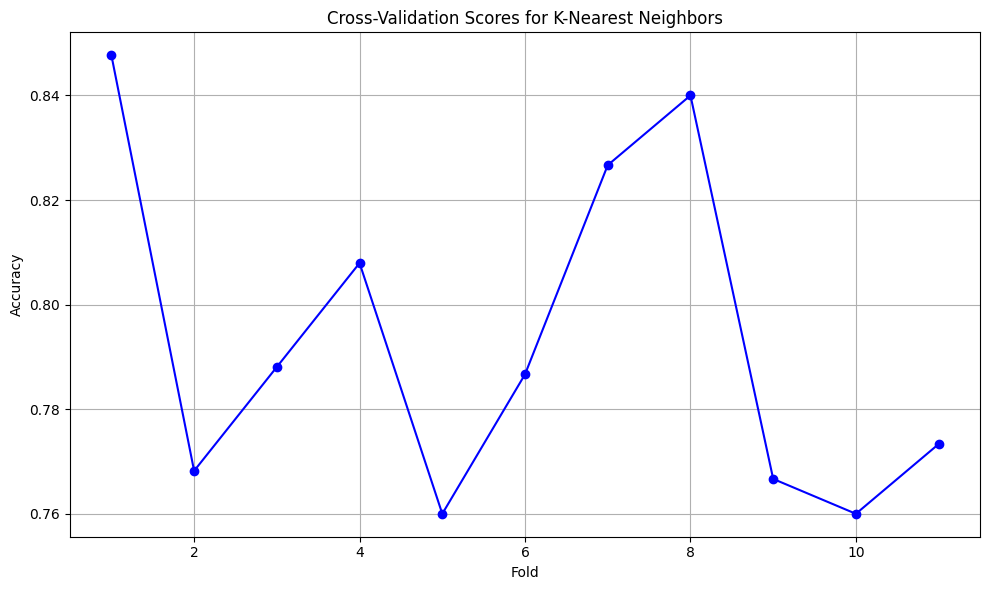

Accuracy for Naive Bayes: 0.6707

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.87      0.36      0.51       827
           1       0.60      0.95      0.73       827

    accuracy                           0.65      1654
   macro avg       0.73      0.65      0.62      1654
weighted avg       0.73      0.65      0.62      1654


Confusion Matrix for Naive Bayes:
[[299 528]
 [ 44 783]]



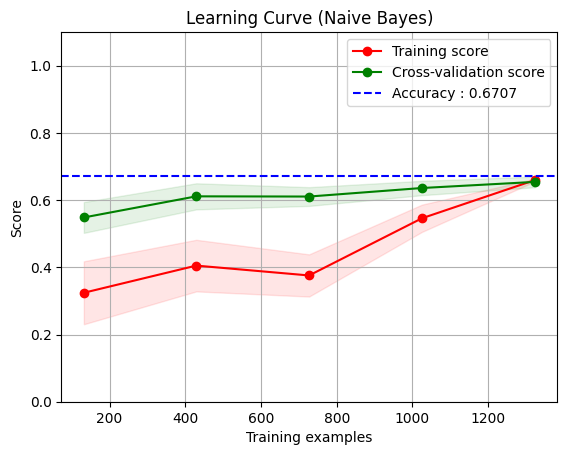

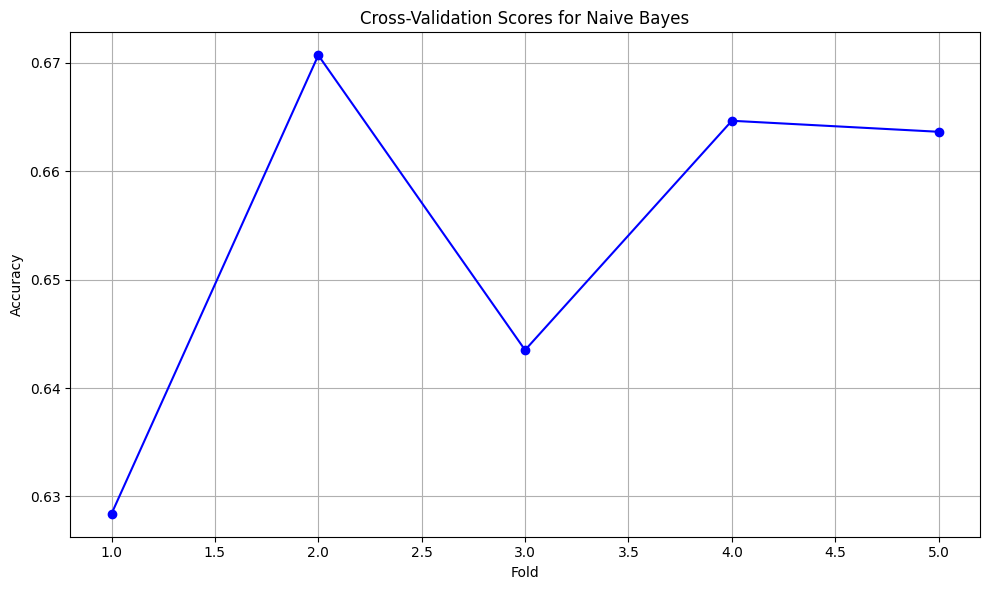

Accuracy for Support Vector Machine: 0.8733

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       827
           1       0.82      0.85      0.83       827

    accuracy                           0.83      1654
   macro avg       0.83      0.83      0.83      1654
weighted avg       0.83      0.83      0.83      1654


Confusion Matrix for Support Vector Machine:
[[669 158]
 [122 705]]



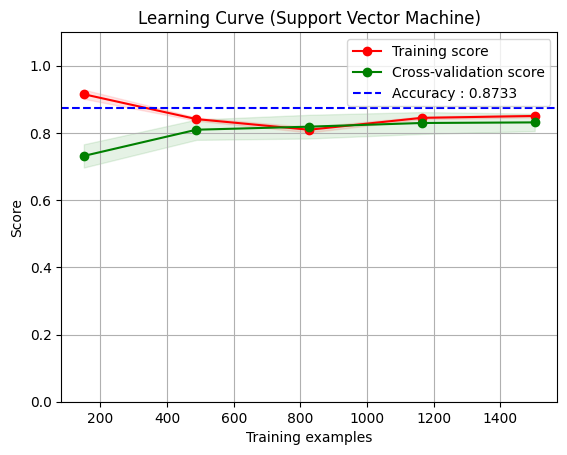

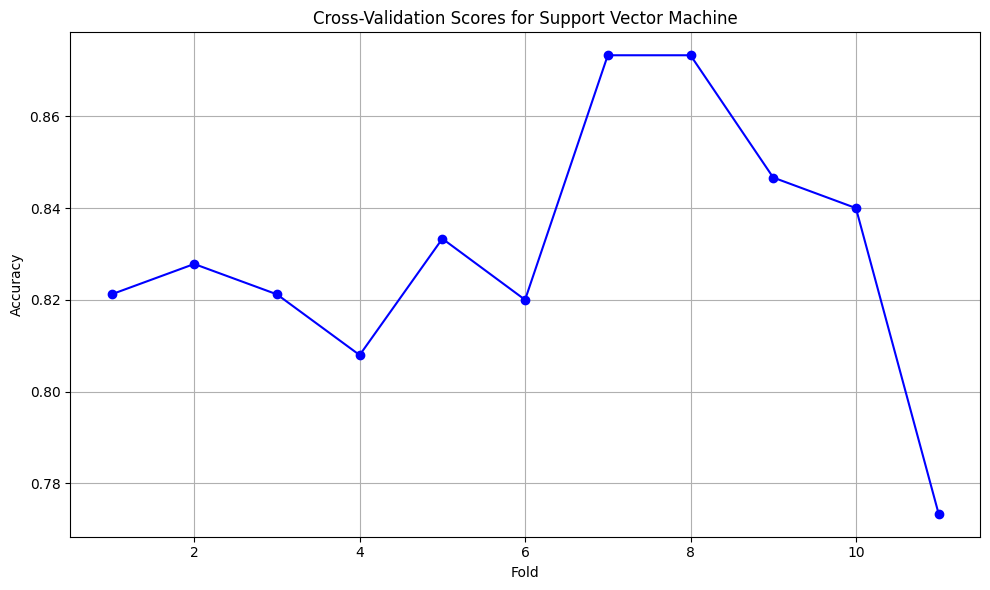

Sorted Model Scores (Ascending):
Model: Naive Bayes
Accuracy: 0.6707

Confusion Matrix for Naive Bayes:
[[298 529]
 [ 47 780]]

Model: Decision Tree
Accuracy: 0.8477

Confusion Matrix for Decision Tree:
[[697 130]
 [148 679]]

Model: K-Nearest Neighbors
Accuracy: 0.8477

Confusion Matrix for K-Nearest Neighbors:
[[495 332]
 [ 10 817]]

Model: Logistic Regression
Accuracy: 0.8543

Confusion Matrix for Logistic Regression:
[[660 167]
 [127 700]]

Model: Support Vector Machine
Accuracy: 0.8733

Confusion Matrix for Support Vector Machine:
[[669 158]
 [122 705]]

Model: Random Forest
Accuracy: 0.9533

Confusion Matrix for Random Forest:
[[800  27]
 [ 92 735]]



In [25]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5), test_accuracy=0):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

# the n_jobs parameter controls how many CPU cores are used to perform the computation.
# n_jobs=-1: Use all available CPU cores.
# When return_times=True, the function returns an additional output
#      train_sizes: An array of the sizes of the training sets used in the learning curve.
#      train_scores: An array of scores for the training sets.
#      test_scores: An array of scores for the test sets.
#      fit_times: An array of the times required to fit the estimator on the training sets of different sizes.


    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes,
        return_times=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Accuracy line
    plt.axhline(y=test_accuracy, color="b", linestyle="--", label=f"Accuracy : {test_accuracy:.4f}")

    # Set the y-axis limits for readability
    plt.ylim(0, 1.1)

    # Add a legend
    plt.legend(loc="best")

    return plt

def plot_cv_results(cv_results, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cv_results) + 1), cv_results, marker='o', linestyle='-', color='b')
    plt.title(f'Cross-Validation Scores for {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# This function evaluates a classifier using cross-validation,
#identifying the best model based on accuracy,
# and then retrains this best model on the best train-test split.
# It generates and prints the classification report, confusion matrix,
# and learning curves, while also plotting cross-validation results.

def evaluate_model(classifier, X, y, cv, model_name):
    cv_scores = []
    best_model = None
    best_score = 0
    best_train_idx, best_test_idx = None, None

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train classifier
        classifier.fit(X_train, y_train)

        # Predict on test set
        y_pred = classifier.predict(X_test)

        # Calculate accuracy and store
        accuracy = accuracy_score(y_test, y_pred)
        cv_scores.append(accuracy)

        # Check if this is the best model so far
        if accuracy > best_score:
            best_score = accuracy
            best_model = classifier
            best_train_idx, best_test_idx = train_idx, test_idx


    print(f"Accuracy for {model_name}: {best_score:.4f}\n")

    # Retrain the best model on the best split
    X_train, X_test = X.iloc[best_train_idx], X.iloc[best_test_idx]
    y_train, y_test = y.iloc[best_train_idx], y.iloc[best_test_idx]
    best_model.fit(X_train, y_train)

    # Plot learning curve
    title = f"Learning Curve ({model_name})"
    plot_learning_curve(best_model, title, X, y, cv=cv, test_accuracy=best_score)

    # Get predictions on whole dataset for final evaluation
    y_pred_all = cross_val_predict(best_model, X, y, cv=cv)
    report = classification_report(y, y_pred_all)
    cm = confusion_matrix(y, y_pred_all)

    # Print final classification report and confusion matrix
    print(f"Classification Report for {model_name}:\n{report}\n")
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")

    # Plot cross-validation results
    plot_cv_results(cv_scores, model_name)

    return best_score, best_model



# Apply SMOTE outside of the evaluate_model function
# smote: a method used in machine learning to balance class distribution by generating synthetic samples for the minority class.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

models = [
    # Regularization is a technique used in machine learning to prevent overfitting.
    # so c = 0.1 This helps prevent overfitting by discouraging large coefficients.
    # The solver parameter in logistic regression specifies the algorithm that the model uses to find the best-fitting line or decision boundary.
    # Different solvers use different methods to minimize the cost function and find the optimal coefficients.
    (LogisticRegression(max_iter=1000, class_weight='balanced', C=0.1, solver='liblinear'), "Logistic Regression"),
    (DecisionTreeClassifier(max_depth=5,           # Limits the maximum depth of the tree to 5 levels.
                            min_samples_split=20,  # Sets the minimum number of samples required to split an internal node.
                            min_samples_leaf=10,  #  Specifies the minimum number of samples that a leaf node must have
                            random_state=42), # This ensures that the results of your code are reproducible.
                            "Decision Tree"),
    (RandomForestClassifier(
        n_estimators=100,  # trees numbres
        max_depth=10,  # profondor number
        min_samples_split=10,  # augmenter le nombre minimal d'échantillons requis pour diviser un nœud
        min_samples_leaf=5,  # augmenter le nombre minimal d'échantillons par feuille
        max_features='sqrt',  # limiter le nombre de caractéristiques considérées pour chaque division
        random_state=42
    ), "Random Forest"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (GaussianNB(), "Naive Bayes"),
    (SVC(kernel='linear', class_weight='balanced', C=0.1, random_state=42), "Support Vector Machine")
]
# Evaluate and store model scores and best models
model_scores = []

for classifier, model_name in models:
    k_fold = StratifiedKFold(n_splits=11 if model_name != "Naive Bayes" else 5, shuffle=True, random_state=42)
    score, best_model = evaluate_model(classifier, X_resampled, y_resampled, k_fold, model_name)
    model_scores.append((model_name, score, best_model))

# Sort models by score in ascending order
model_scores.sort(key=lambda x: x[1])

# Print sorted model scores and detailed evaluation
print("Sorted Model Scores (Ascending):")
for model_name, accuracy, best_model in model_scores:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}\n")

    # Get predictions on whole dataset for final evaluation
    y_pred_all = cross_val_predict(best_model, X_resampled, y_resampled, cv=k_fold)
    report = classification_report(y_resampled, y_pred_all)
    cm = confusion_matrix(y_resampled, y_pred_all)

    # Print final  confusion matrix
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")